<h1><center> Wallmart Case Study

In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF

## Table of contents
- 1. Initial Exploration
    - 1.1 Problem Statement
    - 1.2 Basic Analysis
    - 1.3 Data Type Conversion
    - 1.4 Statistical Analysis
    - 1.5 Outliers Detection
    - 1.6 Unique/Value_Counts
    - 1.7 Non-Graphical Analysis
- 2. Graphical Analysis
    - 2.1 Univariate Analysis
    - 2.2 Bivariate Analysis
    - 2.3 Multivariate Analysis
- 3. Probability Analysis
- 4. Confidence Intervals
- 5. Insights & Recommendations
    - 5.1 Insights
    - 5.2 Recommendations

## 1. Initial Exploration

### 1.1 Problem Statement
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### 1.2 Basic Analysis

In [193]:
df = pd.read_csv("walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [194]:
print(f'Rows: {df.shape[0]}, Cols: {df.shape[1]}')

Rows: 550068, Cols: 10


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


- 5 Categorical Columns
- 5 Numerical Columns

In [196]:
print(f'Null Values: {df.isnull().sum().sum()}')

Null Values: 0


### 1.3 Data Type Conversion

In [197]:
df["Product_Category"] = df["Product_Category"].astype("object")
df["Marital_Status"] = df["Marital_Status"].astype("object")
df["Occupation"] = df["Occupation"].astype("object")
df["User_ID"] = df["User_ID"].astype("object")

- Marital_Status is binary output either Yes or No
- Product Category/User_ID itself can be defined as a Category 
- Occupation here is an Ordinal Category

### 1.4 Statistical Analysis

In [198]:
numerical_analysis = df.describe().T
numerical_analysis["mean"] = numerical_analysis["mean"].apply('{:.3f}'.format)
numerical_analysis

,count,mean,std,min,25%,50%,75%,max
Purchase,550068.0,9263.969,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


- Median Purchase: 8047
- Mean Purchase: 9264
- Presence of some outlers in purchase Region

In [199]:
categorical_analysis = df.describe(include = "object").T
categorical_analysis

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


- Analysis concluded under Unique/Value_Counts

### 1.5 Outliers Detection

In [200]:
purchase_amt = df["Purchase"]
q3 = np.quantile(purchase_amt,0.75)
q1 = np.quantile(purchase_amt,0.25)

In [201]:
IQR = q3-q1
print(f"Interquartile Range: {IQR}")

Interquartile Range: 6231.0


In [202]:
lower_whisker = max(q1 - 1.5*IQR, 0)
upper_whisker = q3 + 1.5*IQR
print(f"Range from ({lower_whisker},{upper_whisker})")

Range from (0,21400.5)


In [203]:
lower_bound_outliers = len(purchase_amt[purchase_amt < lower_whisker])
purchase_outliers_lower_percent = lower_bound_outliers/len(purchase_amt) * 100
print(f'Percent of outliers in lower region: {purchase_outliers_lower_percent} %')

Percent of outliers in lower region: 0.0 %


In [204]:
upper_bound_outliers = len(purchase_amt[purchase_amt > upper_whisker])
purchase_outliers_upper_percent = upper_bound_outliers/len(purchase_amt) * 100
print(f'Percent of outliers in upper region: {purchase_outliers_upper_percent:.3f} %')

Percent of outliers in upper region: 0.487 %


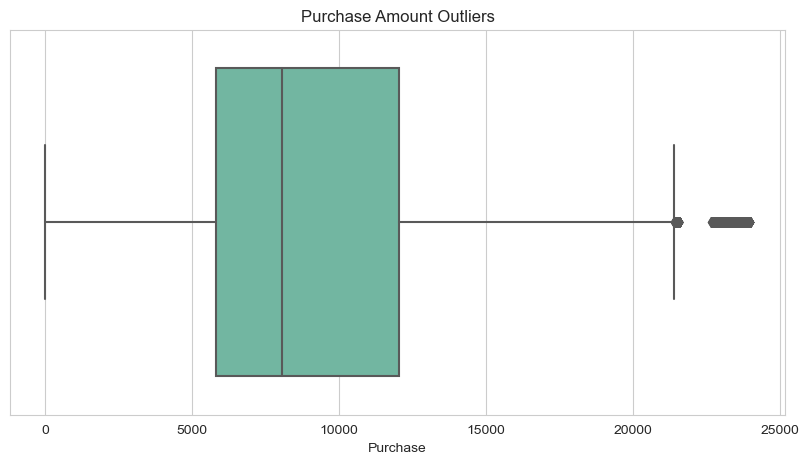

In [205]:
plt.figure(figsize = (10,5))
plt.title("Purchase Amount Outliers")
sns.set_palette(palette="Set2",n_colors=8)
sns.set_style(style="whitegrid")
sns.boxplot(data=df, x="Purchase")
plt.show()

- 0.48 % of outlers observed in upper region

### 1.6 Unique/Value_Counts

##### Product_ID / User_ID

In [206]:
print(f'Total Unique values in Product_ID: {df["Product_ID"].nunique()}')
print(f'Total Unique values in User_ID: {df["User_ID"].nunique()}')

Total Unique values in Product_ID: 3631
Total Unique values in User_ID: 5891


##### Gender

In [207]:
print(f'Total Unique values: {df["Gender"].nunique()}')
df["Gender"].value_counts(normalize=True) * 100

Total Unique values: 2


M    75.310507
F    24.689493
Name: Gender, dtype: float64

- 75.3 % enteries of Male
- 24.7 % enteries of Female

##### Age

In [208]:
print(f'Total Unique values: {df["Age"].nunique()}')
df["Age"].value_counts(normalize=True) * 100

Total Unique values: 7


26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

- This data implies that the largest proportion of entries in dataset are people aged between 26 and 35 and The least represented age group in dataset is 0-17.

##### City_Category

In [209]:
print(f'Total Unique values: {df["City_Category"].nunique()}')
df["City_Category"].value_counts(normalize=True) * 100

Total Unique values: 3


B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

- Majority of enteries from City B

##### Stay_In_Current_City_Years

In [210]:
print(f'Total Unique values: {df["Stay_In_Current_City_Years"].nunique()}')
df["Stay_In_Current_City_Years"].value_counts(normalize=True) * 100

Total Unique values: 5


1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64

- Majority of people stay atleast for 1 year in a City

##### Occupation

In [211]:
print(f'Total Unique values: {df["Occupation"].nunique()}')
df["Occupation"].value_counts(normalize=True) * 100

Total Unique values: 21


4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: Occupation, dtype: float64

- Most frequent Occupation(Status) is 4 while least common is 8

##### Product_Category

In [212]:
print(f'Total Unique values: {df["Product_Category"].nunique()}')
df["Product_Category"].value_counts(normalize=True) * 100

Total Unique values: 20


5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: Product_Category, dtype: float64

- Product Category 5 has most stock while Product Category 9 has least

##### Marital_Status

In [213]:
print(f'Total Unique values: {df["Marital_Status"].nunique()}')
df["Marital_Status"].value_counts(normalize=True) * 100

Total Unique values: 2


0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

- Majority of enteries are for unmarried members

### 1.7 Non Graphical Analysis

##### Gender

In [214]:
gender_purchase = df.groupby(['Gender'])['Purchase'].describe()
gender_purchase

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


- Average Female Purchase amount observed : 8734
- Average Male Purchase amount observed: 9437

##### Marital_Status

In [276]:
marital_purchase = df.groupby(['Marital_Status'])['Purchase'].describe()
marital_purchase

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


- Average Married and Unmarried Purchase amount are almost same

##### User_ID Analysis

In [215]:
# Analysing Monetary
purchase_uid = df.groupby("User_ID").describe()
purchase_uid.sort_values([('Purchase',  '50%'),('Purchase',  'mean')], ascending=False,inplace=True)

In [216]:
print("Head:-")
display(purchase_uid.head())
print("Tail:-")
display(purchase_uid.tail())

Head:-


Purchase                                                        \
           count          mean          std     min       25%      50%   
User_ID                                                                  
1005069     18.0  18490.166667  6017.453480   597.0  18615.50  20297.5   
1005999     18.0  18345.944444  5897.298569  5185.0  16848.25  20170.0   
1006034     12.0  16423.833333  6989.922523  2311.0  11754.50  19494.5   
1001258     24.0  15039.166667  7740.708234    13.0   7598.00  19463.0   
1003902     94.0  18577.893617  3114.413504    38.0  19083.00  19304.5   

                            
              75%      max  
User_ID                     
1005069  22479.25  23772.0  
1005999  23130.50  23933.0  
1006034  21249.00  23703.0  
1001258  20431.25  23847.0  
1003902  19482.50  19697.0

Tail:-


Purchase                                                              \
           count         mean          std     min      25%     50%      75%   
User_ID                                                                        
1005944     15.0  3599.733333  2459.248040  1369.0  1980.50  2121.0  4477.50   
1003598     42.0  2698.357143  1349.969192   601.0  1935.00  2113.5  4162.75   
1004486     30.0  2318.733333  1132.589189    24.0  1838.50  2092.5  2642.25   
1004575     74.0  4943.027027  5211.832189    24.0  1650.75  1759.5  8659.50   
1001341     51.0  4795.705882  5056.108671   250.0  1589.00  1706.0  7465.00   

                  
             max  
User_ID           
1005944   8706.0  
1003598   4802.0  
1004486   4640.0  
1004575  19634.0  
1001341  20495.0

- User_ID 1005069 has highest median purchase
- User_ID 1001341 has lowest median purchase

In [217]:
# Analysing Frequency
purchase_uid.sort_values(('Purchase',  'count'), ascending=False,inplace=True)

In [218]:
print("Head:-")
display(purchase_uid.head())
print("Tail:-")
display(purchase_uid.tail())

Head:-


Purchase                                                               \
           count          mean          std    min      25%     50%       75%   
User_ID                                                                         
1001680   1026.0   8479.138402  4695.466071  364.0  5334.50  7760.0  10075.00   
1004277    979.0  10762.930541  4898.856157  126.0  7190.50  9738.0  15371.00   
1001941    898.0   7591.863029  4720.768065  405.0  3745.75  6831.5  10965.75   
1001181    862.0   7410.627610  4112.703021   62.0  4249.50  6120.5   9729.75   
1000889    823.0   6682.712029  3958.976886   60.0  3957.50  5920.0   8042.00   

                  
             max  
User_ID           
1001680  23631.0  
1004277  23615.0  
1001941  21160.0  
1001181  23579.0  
1000889  23835.0

Tail:-


Purchase                                                       \
           count          mean          std     min      25%      50%   
User_ID                                                                 
1005810      7.0  11478.571429  7186.414773    61.0  7941.00  10060.0   
1005608      7.0   8804.000000  6315.344884    48.0  4894.00   7839.0   
1002690      7.0  12541.285714  5587.043455  6994.0  7895.00  10019.0   
1004991      7.0   7481.571429  2530.958702  4077.0  6021.00   7775.0   
1000708      6.0   9770.833333  6161.778880   489.0  8235.25   9218.5   

                            
              75%      max  
User_ID                     
1005810  17106.50  20134.0  
1005608  13819.50  16314.0  
1002690  17730.50  19525.0  
1004991   8181.00  12115.0  
1000708  11550.25  19464.0

In [219]:
# Repeat Customers Percentage
unique_customers = df['User_ID'].nunique()
customers_count = df['User_ID'].value_counts()
repeat_customers = len(customers_count[customers_count > 1])

print(f'Customer Retention %: {repeat_customers/unique_customers * 100}')

Customer Retention %: 100.0


- User_ID 1001680 has highest frequency of  purchase
- User_ID 1000708 has lowest frequency of purchase

##### Product_ID Analysis

In [220]:
# Analysing Monetary
purchase_pid = df.groupby("Product_ID").describe()
purchase_pid.sort_values([("Purchase", "50%"),("Purchase", "mean")], ascending=False,inplace=True)

In [221]:
print("Head:-")
display(purchase_pid.head())
print("Tail:-")
display(purchase_pid.tail())

Head:-


Purchase                                                        \
              count          mean          std     min       25%      50%   
Product_ID                                                                  
P00086242     273.0  21256.505495  3465.721453  5044.0  18989.00  23267.0   
P00085342     552.0  20980.268116  3414.492268  4624.0  18882.00  23171.5   
P00116142     642.0  20463.791277  3699.385219  4691.0  18731.25  23074.5   
P00052842     982.0  20141.139511  4018.881465  5210.0  18622.00  23046.0   
P00071442     737.0  18951.667571  3291.291034  4197.0  17025.00  20878.0   

                               
                 75%      max  
Product_ID                     
P00086242   23620.00  23959.0  
P00085342   23585.00  23958.0  
P00116142   23496.00  23959.0  
P00052842   23476.75  23961.0  
P00071442   21237.00  21569.0

Tail:-


Purchase                                                           
              count        mean         std    min    25%    50%    75%    max
Product_ID                                                                    
P00375436     814.0  374.266585  164.192800  118.0  244.0  371.0  490.0  613.0
P00372445     837.0  374.930705  165.766359  118.0  244.0  369.0  490.0  613.0
P00371644     899.0  362.911012  170.871684  118.0  238.5  365.0  490.0  613.0
P00370853     818.0   37.393643   16.919684   12.0   25.0   37.0   50.0   62.0
P00370293     785.0   36.675159   16.819274   12.0   24.0   37.0   49.0   62.0

- Product_ID P00086242 has highest median purchase
- Product_ID P00370293 has lowest median purchase

In [222]:
# Analysing Frequency
purchase_pid.sort_values([("Purchase", "count"),("Purchase", "mean")], ascending=False,inplace=True)

In [223]:
print("Head:-")
display(purchase_pid.head())
print("Tail:-")
display(purchase_pid.tail())

Head:-


Purchase                                                        \
              count          mean          std     min       25%      50%   
Product_ID                                                                  
P00265242    1880.0   7534.848404  1683.985956  1720.0   6947.75   8605.0   
P00025442    1615.0  17334.468111  2955.609692  3961.0  15563.00  19084.0   
P00110742    1612.0  16577.114764  3266.793787  3798.0  15315.25  15897.0   
P00112142    1562.0  15503.204866  3574.019615  3793.0  12007.25  15621.0   
P00057642    1470.0  15716.176871  3470.043730  3890.0  15189.50  15647.5   

                              
                75%      max  
Product_ID                    
P00265242    8762.0   8907.0  
P00025442   19409.0  19707.0  
P00110742   19297.0  19708.0  
P00112142   19128.0  19706.0  
P00057642   19189.0  19708.0

Tail:-


Purchase                                                    
              count    mean std     min     25%     50%     75%     max
Product_ID                                                             
P00012942       1.0  1717.0 NaN  1717.0  1717.0  1717.0  1717.0  1717.0
P00325342       1.0  1656.0 NaN  1656.0  1656.0  1656.0  1656.0  1656.0
P00353042       1.0  1545.0 NaN  1545.0  1545.0  1545.0  1545.0  1545.0
P00309042       1.0   726.0 NaN   726.0   726.0   726.0   726.0   726.0
P00091742       1.0   405.0 NaN   405.0   405.0   405.0   405.0   405.0

- Product_ID P00265242 has highest frequency of purchase
- Product_ID P00091742 has lowest frequency of purchase

## 2. Graphical Analysis

### 2.1 Univariate Analysis

##### Continuous Columns

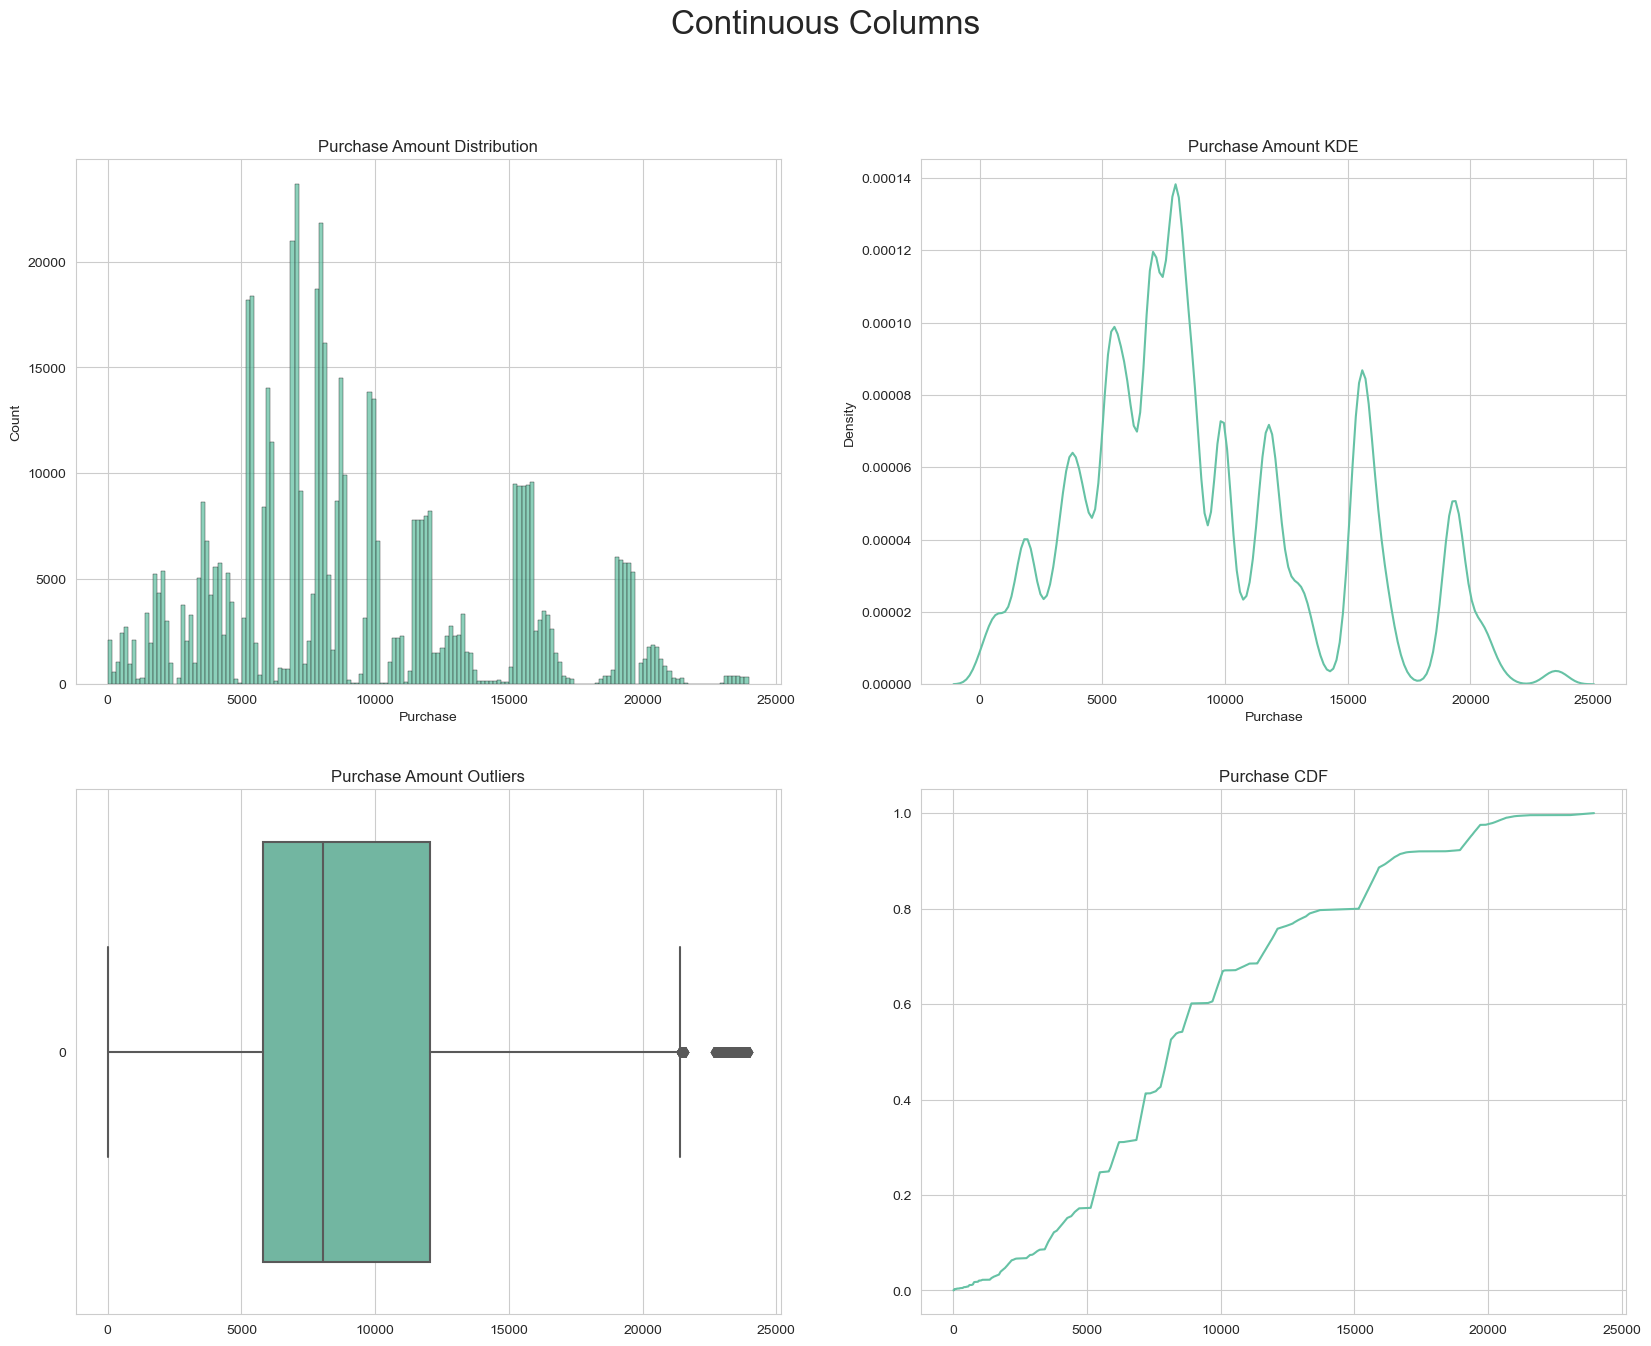

In [224]:
fig,ax = plt.subplots(2,2, figsize=(20,15))
plt.suptitle("Continuous Columns",fontsize=24)

ax[0,0].set_title("Purchase Amount Distribution")
sns.histplot(data = df["Purchase"], edgecolor = "0.15", ax=ax[0,0])

ax[0,1].set_title("Purchase Amount KDE")
sns.kdeplot(data=df["Purchase"], ax=ax[0,1])

ax[1,0].set_title("Purchase Amount Outliers")
sns.boxplot(data=df["Purchase"],orient="h",ax=ax[1,0])

ax[1,1].set_title("Purchase CDF")
e = ECDF(df["Purchase"])
ax[1,1].plot(e.x,e.y)

plt.show()

In [225]:
purchase_amt = df['Purchase']
print(f'Skewness of Distribution: {purchase_amt.skew():.3f}, Kurtosis of Distribution: {purchase_amt.kurt():.3f}')

Skewness of Distribution: 0.600, Kurtosis of Distribution: -0.338


- The data exhibits a multimodal distribution, indicating the presence of multiple sub-groups each potentially following its own normal distribution.
- The distribution presents a positive skewness of 0.600, suggesting a right-skewed distribution where the right tail is longer or fatter than the left.
- A negative kurtosis value of -0.388 is observed, implying a platykurtic distribution with light tails, indicating fewer outliers or less extreme outliers.
- Outliers are present towards the upper range of the data.
- As per the cumulative distribution function (CDF), the 80th percentile of customers' purchasing power is $15,000, meaning 80% of customers have purchasing power below this amount.

##### Categorical Columns

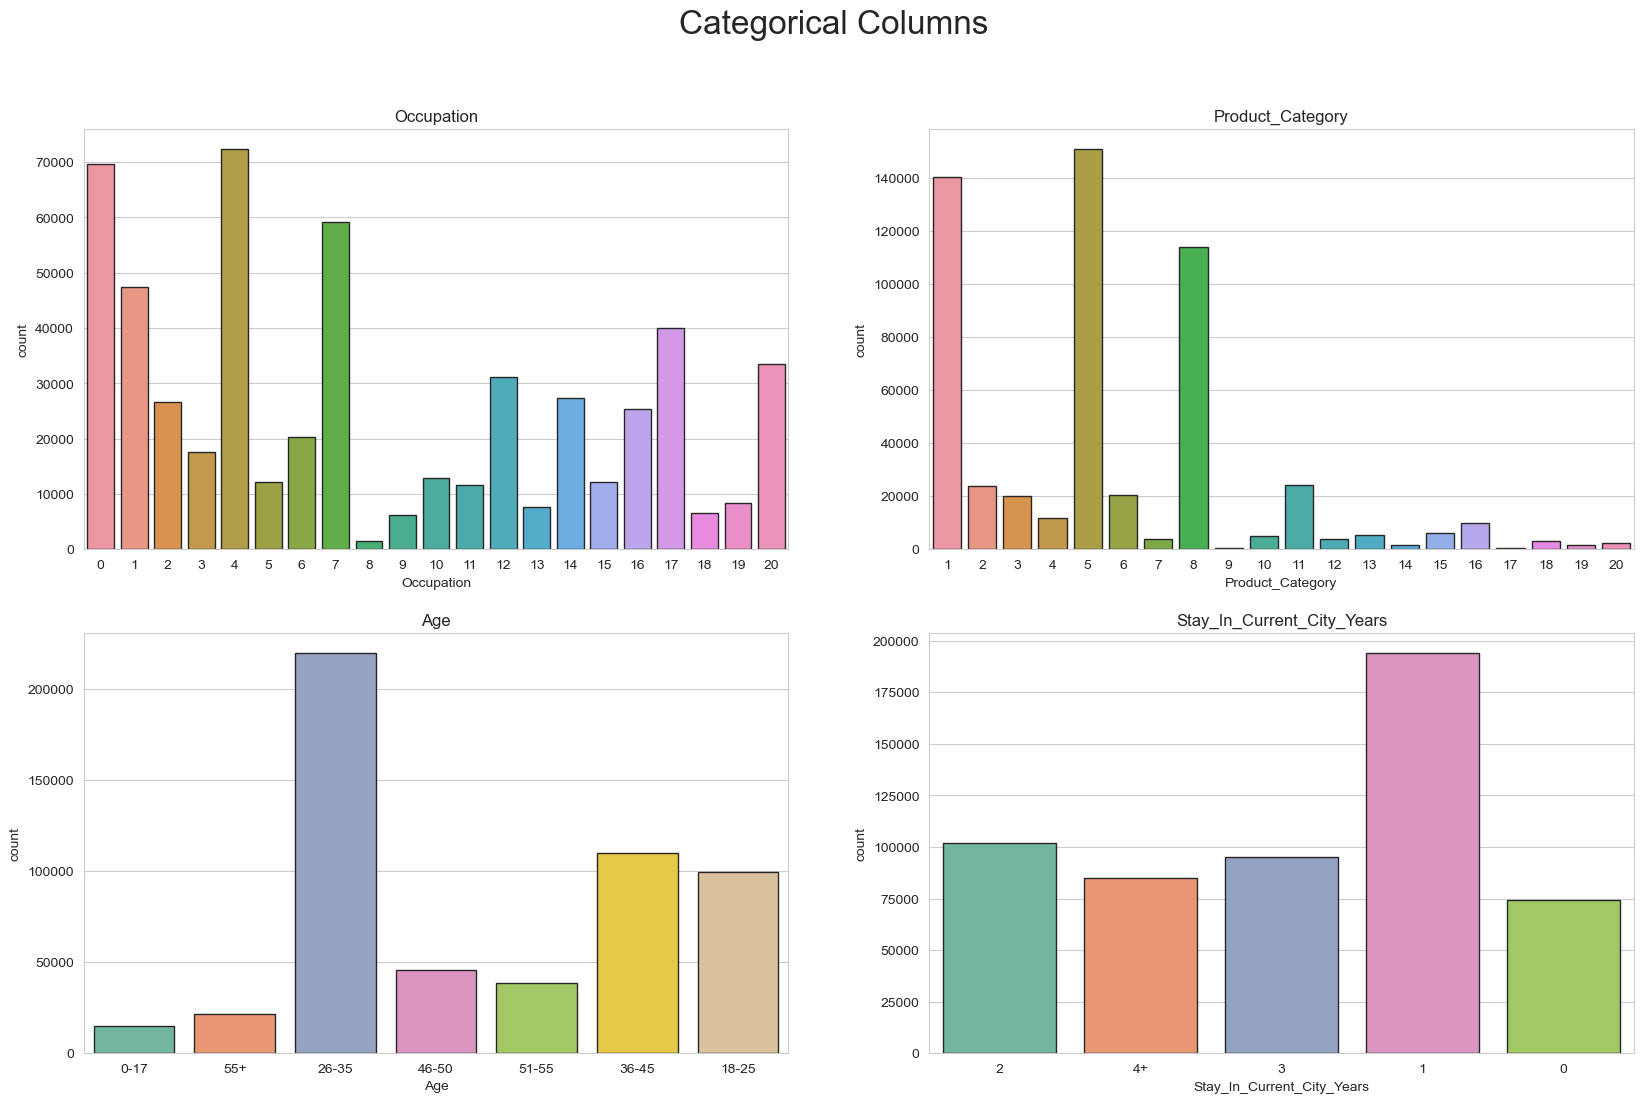

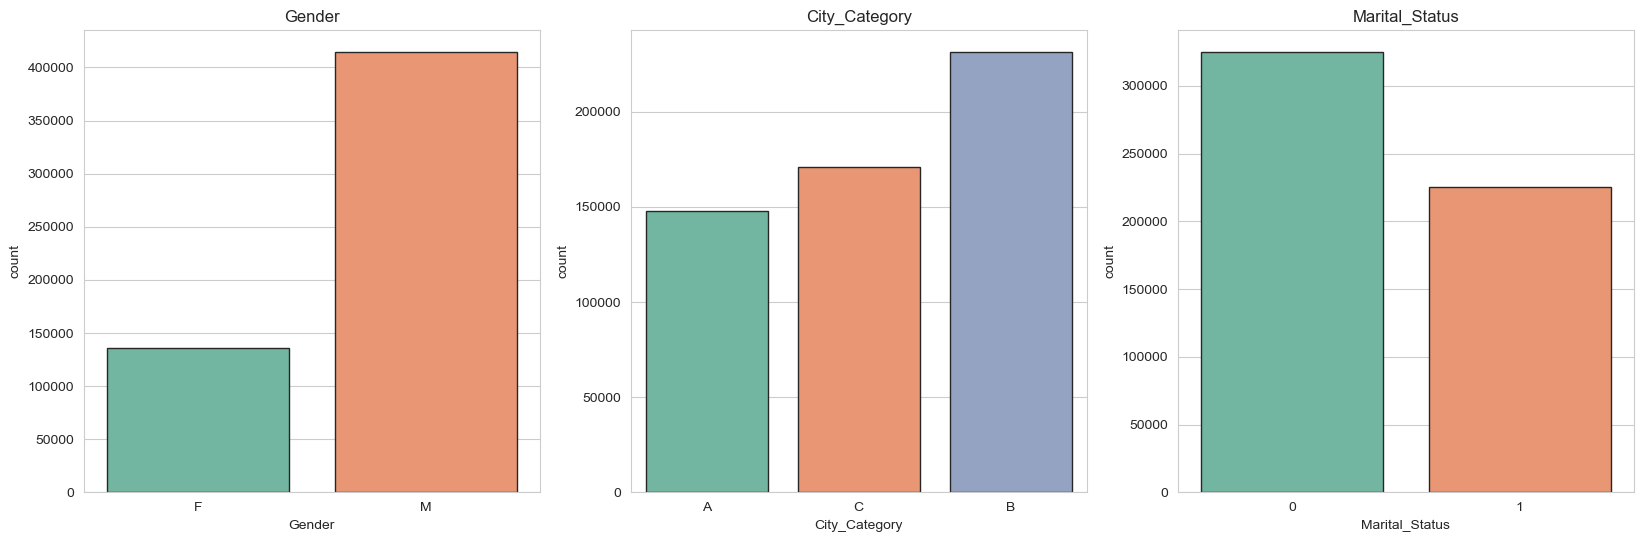

In [226]:
fig,ax = plt.subplots(2,2,figsize=(20,12))
plt.suptitle("Categorical Columns",fontsize=24)

ax[0,0].set_title("Occupation")
sns.countplot(x=df['Occupation'], edgecolor="0.15", ax=ax[0,0])

ax[0,1].set_title("Product_Category")
sns.countplot(x=df['Product_Category'], edgecolor="0.15", ax=ax[0,1])

ax[1,0].set_title("Age")
sns.countplot(x=df['Age'], edgecolor="0.15", ax=ax[1,0])

ax[1,1].set_title("Stay_In_Current_City_Years")
sns.countplot(x=df['Stay_In_Current_City_Years'], edgecolor="0.15", ax=ax[1,1])


fig,ax = plt.subplots(1,3,figsize=(20,6))

ax[0].set_title("Gender")
sns.countplot(x=df['Gender'], edgecolor="0.15", ax=ax[0])

ax[1].set_title("City_Category")
sns.countplot(x=df['City_Category'], edgecolor="0.15", ax=ax[1])

ax[2].set_title("Marital_Status")
sns.countplot(x=df['Marital_Status'], edgecolor="0.15", ax=ax[2])

plt.show()

- Same Analysis observed under Unique/Value_Counts

In [227]:
purchase_amt = df['Purchase']
print(f'Min Purchase Amount: {purchase_amt.min()}, Max Purchase Amount: {purchase_amt.max()}')

Min Purchase Amount: 12, Max Purchase Amount: 23961


In [228]:
bins = np.arange(0,30000,5000)
labels = ['0-5','5-10','10-15','15-20','20-25']
df["PurchaseBin"] = pd.cut(df["Purchase"],bins=bins,labels=labels)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,PurchaseBin
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,5-10
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,15-20
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,0-5
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,0-5
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,5-10


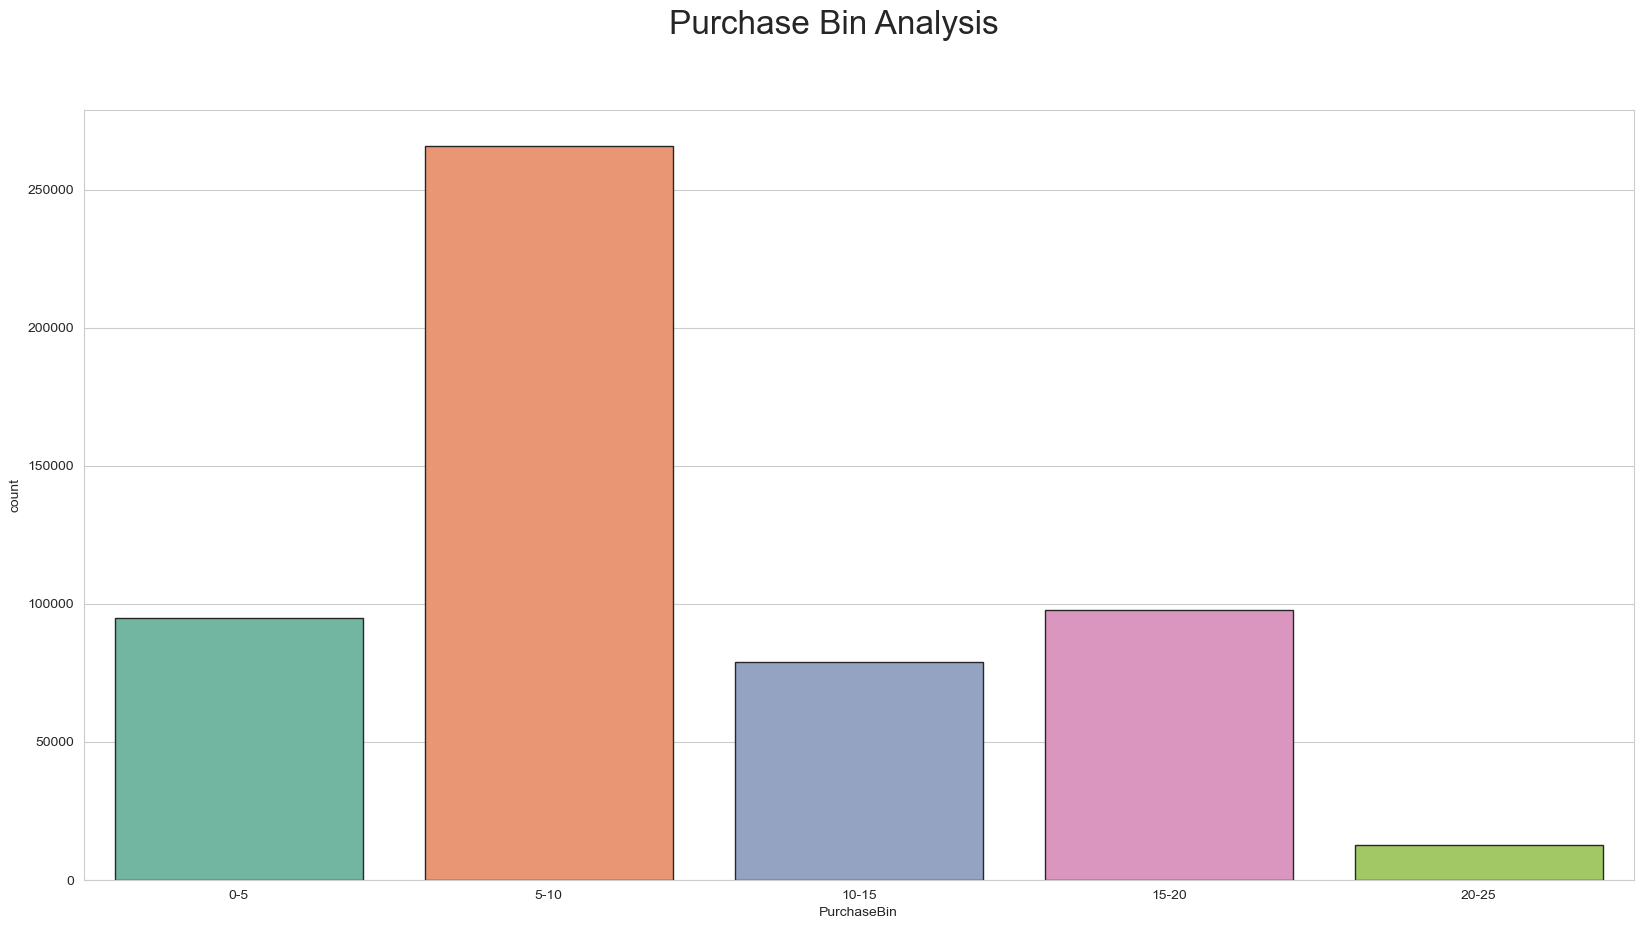

In [229]:
plt.figure(figsize=(20,10))
plt.suptitle("Purchase Bin Analysis",fontsize=24)
sns.countplot(x=df["PurchaseBin"],edgecolor="0.15")
plt.show()

- Most purchases are made between 5000 - 10000

### 2.2 Bivariate Analysis

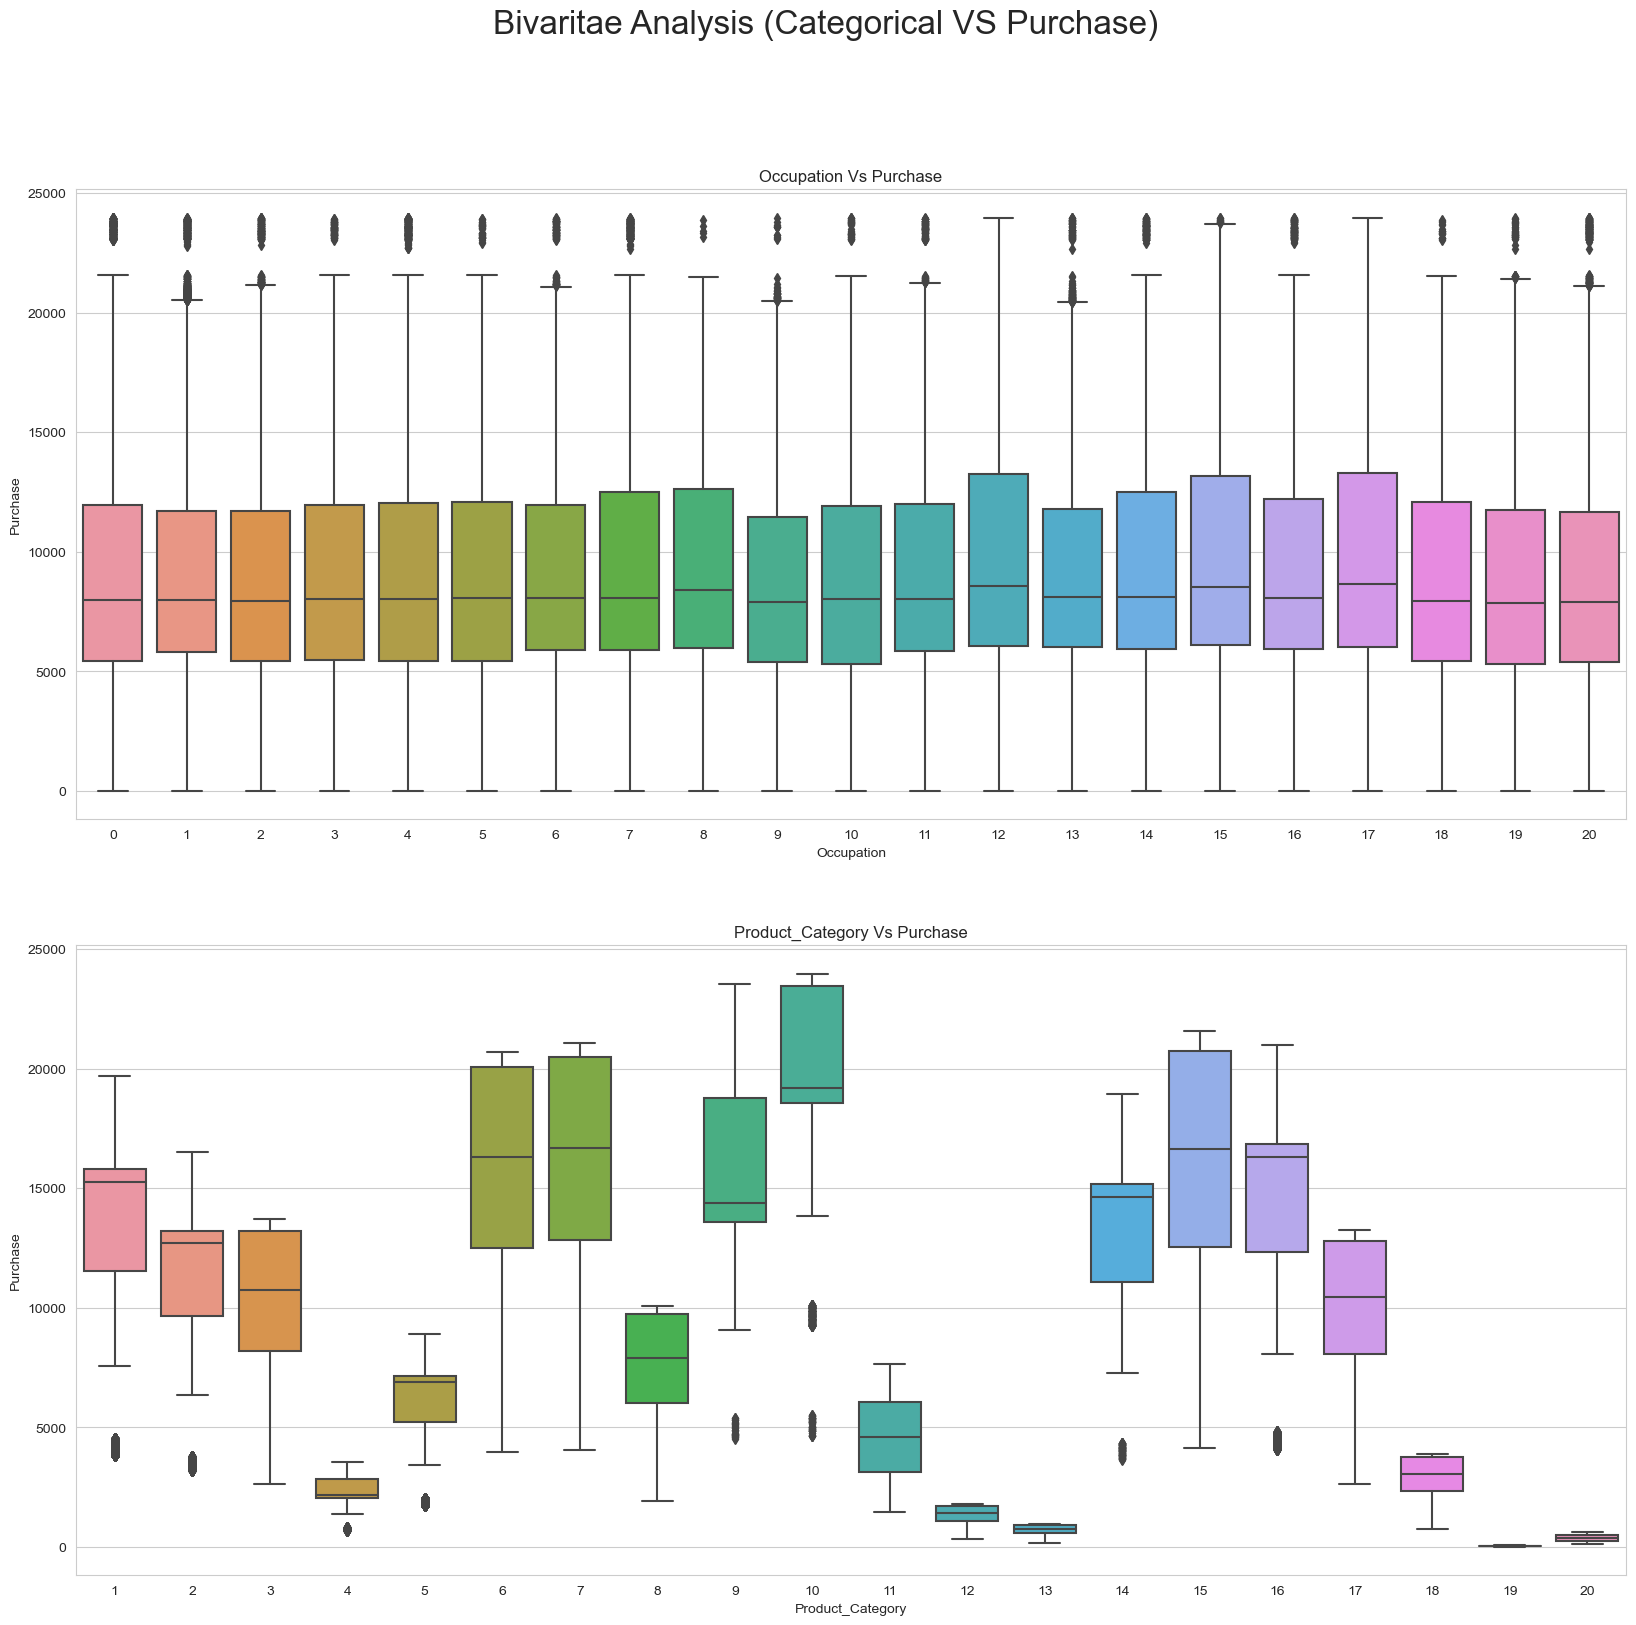

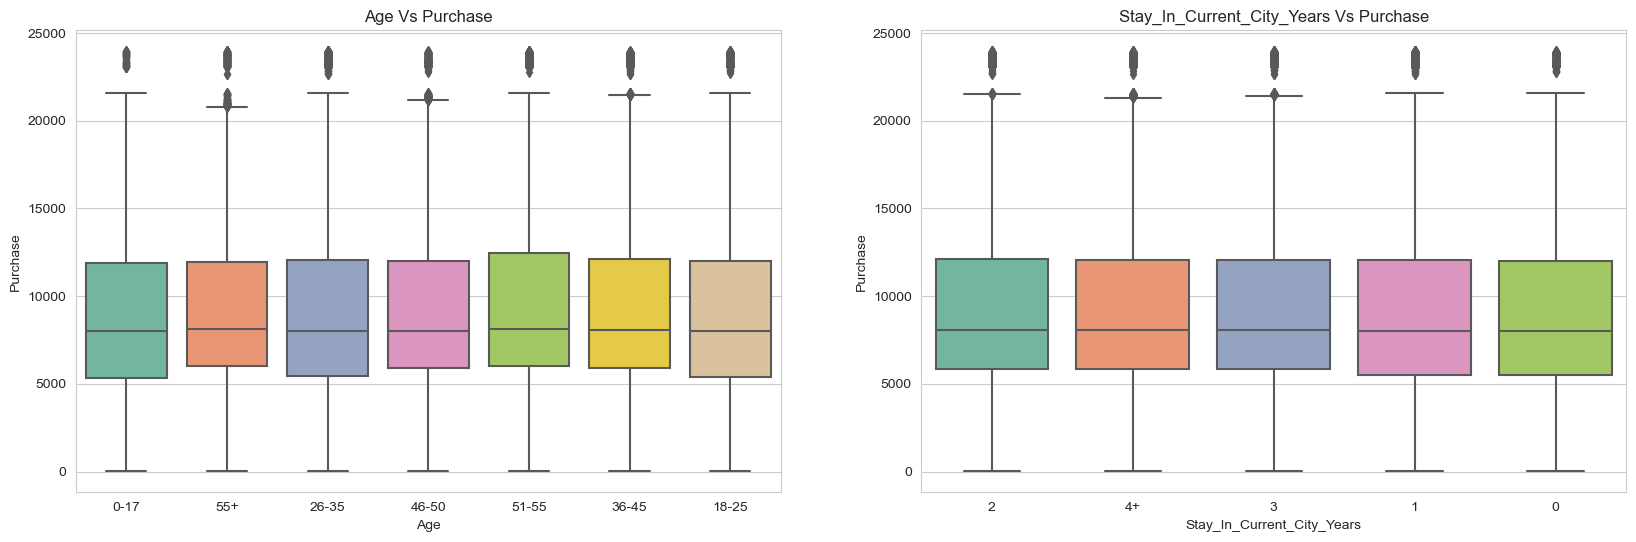

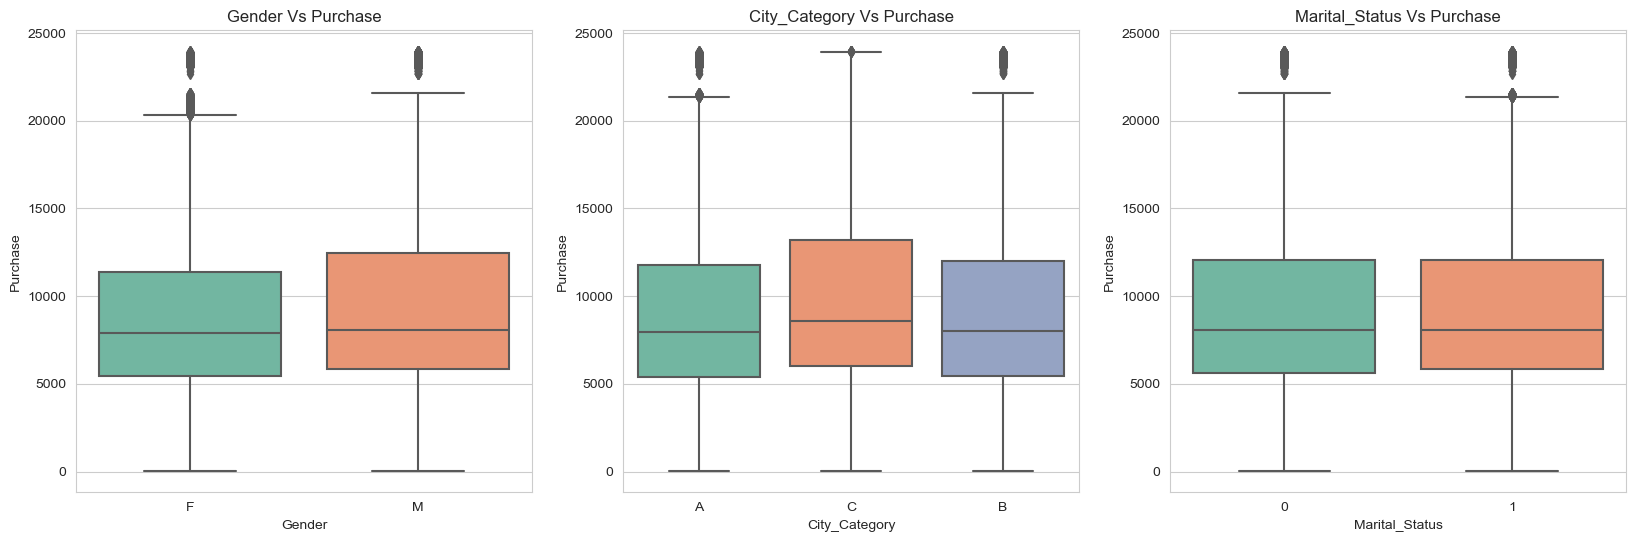

In [230]:
fig,ax = plt.subplots(2,1,figsize=(20,18))
plt.suptitle("Bivaritae Analysis (Categorical VS Purchase)",fontsize=24)

ax[0].set_title("Occupation Vs Purchase")
sns.boxplot(data = df, x= "Occupation", y = "Purchase", ax=ax[0])

ax[1].set_title("Product_Category Vs Purchase")
sns.boxplot(data = df, x= "Product_Category", y = "Purchase", ax=ax[1])

fig,ax = plt.subplots(1,2,figsize=(20,6))
ax[0].set_title("Age Vs Purchase")
sns.boxplot(data = df, x= "Age", y = "Purchase", ax=ax[0])

ax[1].set_title("Stay_In_Current_City_Years Vs Purchase")
sns.boxplot(data = df, x= "Stay_In_Current_City_Years", y = "Purchase", ax=ax[1])


fig,ax = plt.subplots(1,3,figsize=(20,6))

ax[0].set_title("Gender Vs Purchase")
sns.boxplot(data = df, x= "Gender", y = "Purchase", ax=ax[0])

ax[1].set_title("City_Category Vs Purchase")
sns.boxplot(data = df, x= "City_Category", y = "Purchase", ax=ax[1])

ax[2].set_title("Marital_Status Vs Purchase")
sns.boxplot(data = df, x= "Marital_Status", y = "Purchase", ax=ax[2])

plt.show()

- The 'Occupation' feature appears to have no significant correlation with the 'Purchase' variable.
- 'Product Category 10' is significantly associated with higher purchase amounts.
- 'Age' does not seem to significantly influence the 'Purchase' variable.
- The 'Stay_In_Current_City_Years' feature does not exhibit a significant relationship with the 'Purchase' variable.
- 'Gender' is not found to have a significant impact on purchasing behavior.
- A slightly higher purchasing activity is observed from individuals in 'City C'.
- 'Marital Status' does not demonstrate a significant effect on the 'Purchase' variable.

In [231]:
# Infrencing clearer image on Occupation Feature using Non Graphical Analysis
df.groupby("Product_Category").describe()

Purchase                                               \
                     count          mean          std     min       25%   
Product_Category                                                          
1                 140378.0  13606.218596  4298.834894  3790.0  11546.00   
2                  23864.0  11251.935384  3570.642713  3176.0   9645.75   
3                  20213.0  10096.705734  2824.626957  2638.0   8198.00   
4                  11753.0   2329.659491   812.540292   684.0   2058.00   
5                 150933.0   6240.088178  1909.091687  1713.0   5242.00   
6                  20466.0  15838.478550  4011.233690  3981.0  12505.00   
7                   3721.0  16365.689600  4174.554105  4061.0  12848.00   
8                 113925.0   7498.958078  2013.015062  1939.0   6036.00   
9                    410.0  15537.375610  5330.847116  4528.0  13583.50   
10                  5125.0  19675.570927  4225.721898  4624.0  18546.00   
11                 24287.0   4685.268456  1834.901184  1472.0   3131.00   
12                  3947.0   1350.859894   362.510258   342.0   1071.00   
13                  5549.0    722.400613   183.493126   185.0    578.00   
14                  1523.0  13141.625739  4069.009293  3657.0  11097.00   
15                  6290.0  14780.451828  5175.465852  4148.0  12523.25   
16                  9828.0  14766.037037  4360.213198  4036.0  12354.00   
17                   578.0  10170.759516  2333.993073  2616.0   8063.50   
18                  3125.0   2972.864320   727.051652   754.0   2359.00   
19                  1603.0     37.041797    16.869148    12.0     24.00   
20                  2550.0    370.481176   167.116975   118.0    242.00   

                                              
                      50%       75%      max  
Product_Category                              
1                 15245.0  15812.00  19708.0  
2                 12728.5  13212.00  16504.0  
3                 10742.0  13211.00  13717.0  
4                  2175.0   2837.00   3556.0  
5                  6912.0   7156.00   8907.0  
6                 16312.0  20051.00  20690.0  
7                 16700.0  20486.00  21080.0  
8                  7905.0   9722.00  10082.0  
9                 14388.5  18764.00  23531.0  
10                19197.0  23438.00  23961.0  
11                 4611.0   6058.00   7654.0  
12                 1401.0   1723.00   1778.0  
13                  755.0    927.00    962.0  
14                14654.0  15176.50  18931.0  
15                16660.0  20745.75  21569.0  
16                16292.5  16831.00  20971.0  
17                10435.5  12776.75  13264.0  
18                 3071.0   3769.00   3900.0  
19                   37.0     50.00     62.0  
20                  368.0    490.00    613.0

- The 'Product Category 19' feature is associated with the lowest level of purchase activity in the dataset.

### 2.3 Mutivariate Analysis

##### Correlation

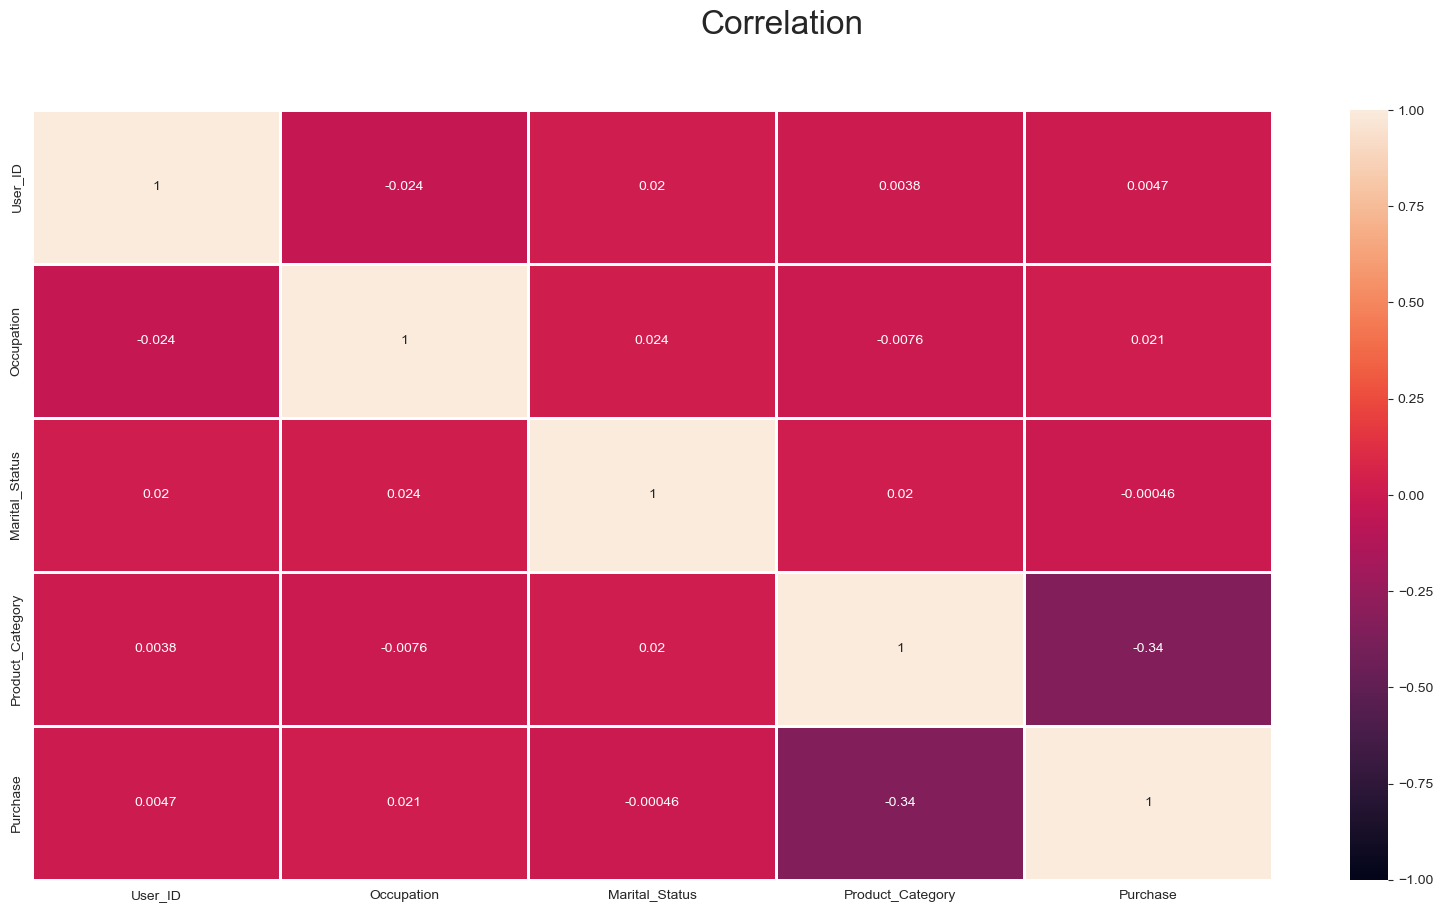

In [232]:
# Analysing Relation on Discrete Quantity as well
correlation_df = pd.read_csv("walmart_data.csv").corr(numeric_only=True)

plt.figure(figsize=(20,10))
plt.suptitle("Correlation",fontsize=24)
sns.heatmap(correlation_df,annot=True,vmin=-1,linewidths=1)
plt.show()

- Product_Categary mildly negative Corelated with Purchase

##### Pairplot

<Figure size 2000x1000 with 0 Axes>

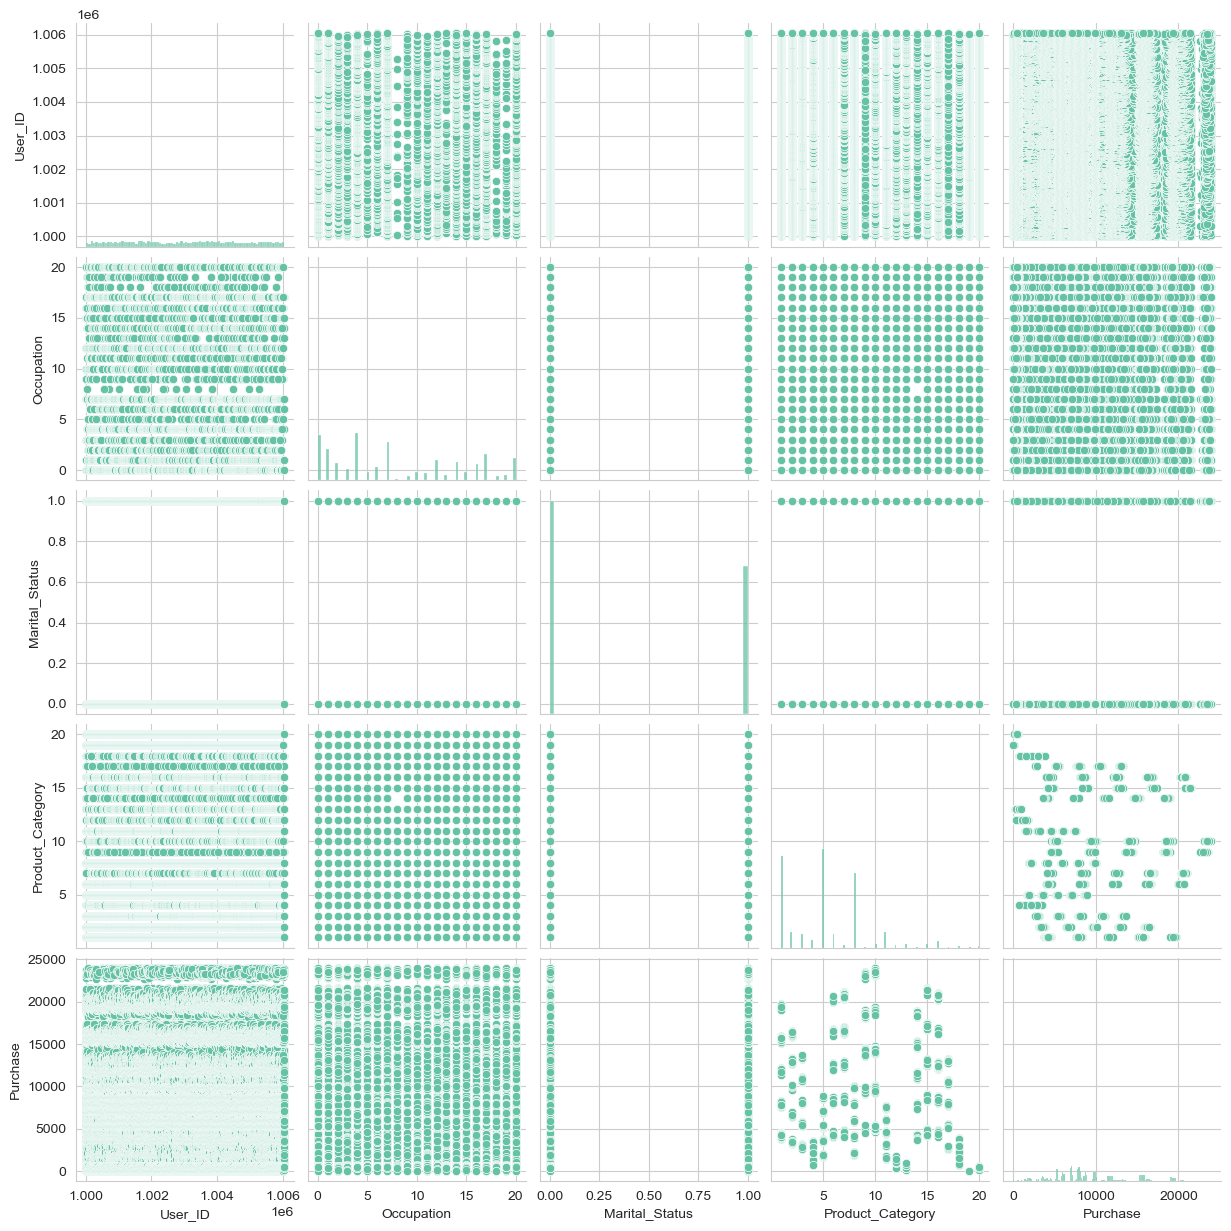

In [233]:
plt.figure(figsize=(20,10))
plt.suptitle("Pairplot",fontsize=24)
sns.pairplot(data = df)
plt.show()

- No specific infrences can be drawn

##### Gender Vs Purchase Vs Categories

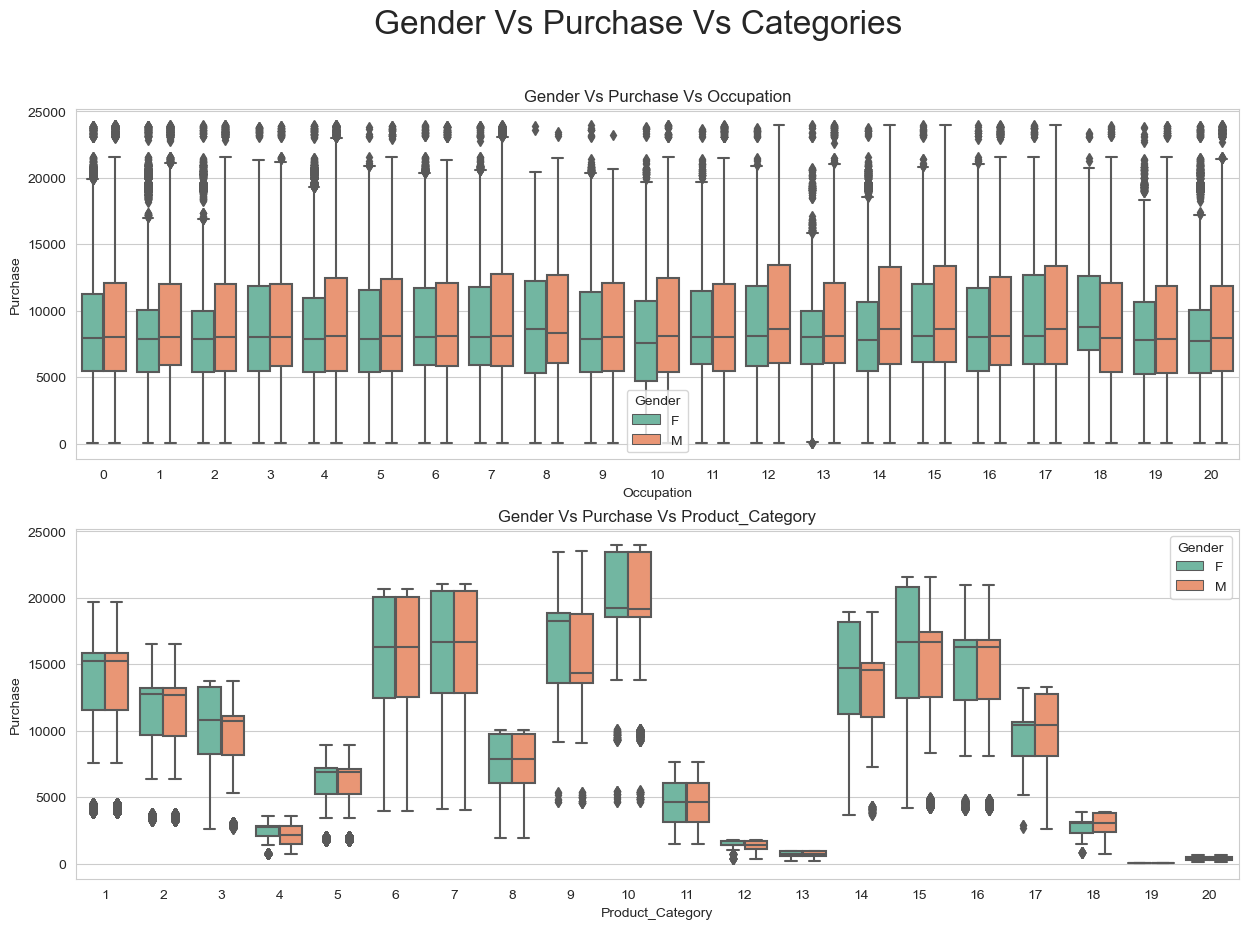

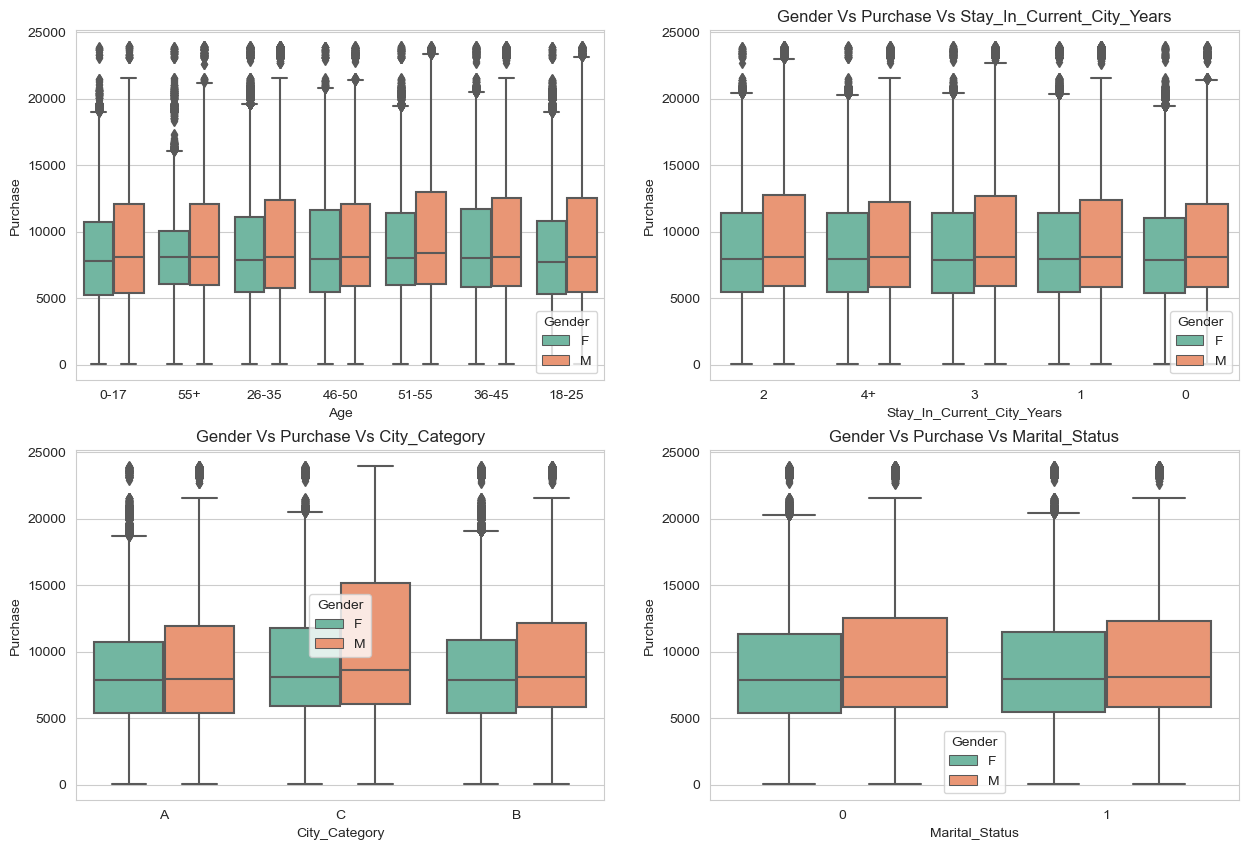

In [234]:
fig,ax = plt.subplots(2,1, figsize=(15,10))
plt.suptitle("Gender Vs Purchase Vs Categories", fontsize=24)

ax[0].set_title("Gender Vs Purchase Vs Occupation")
sns.boxplot(data = df, y = 'Purchase', x = 'Occupation', hue = 'Gender' ,ax=ax[0])

ax[1].set_title("Gender Vs Purchase Vs Product_Category")
sns.boxplot(data = df, y = 'Purchase', x = 'Product_Category', hue = 'Gender', ax=ax[1])

fig,ax = plt.subplots(2,2, figsize=(15,10))

ax[0,1].set_title("Gender Vs Purchase Vs Age")
sns.boxplot(data = df, y = 'Purchase', x = 'Age', hue = 'Gender', ax=ax[0,0])

ax[0,1].set_title("Gender Vs Purchase Vs Stay_In_Current_City_Years")
sns.boxplot(data = df, y = 'Purchase', x = 'Stay_In_Current_City_Years', hue = 'Gender', ax=ax[0,1])

ax[1,0].set_title("Gender Vs Purchase Vs City_Category")
sns.boxplot(data = df, y = 'Purchase', x = 'City_Category', hue = 'Gender', ax=ax[1,0])

ax[1,1].set_title("Gender Vs Purchase Vs Marital_Status")
sns.boxplot(data = df, y = 'Purchase', x = 'Marital_Status', hue = 'Gender', ax=ax[1,1])

plt.show()

- Male purchasing amount slightly greater than female
- Female significant difference of purchase amount observed under Product Category 9

## 3. Probability Analysis

##### Gender

In [235]:
gender_prob = pd.crosstab(index=df['Gender'], columns=df['PurchaseBin'], margins=True, normalize=True).round(2)
gender_prob

PurchaseBin,0-5,5-10,10-15,15-20,20-25,All
Gender,,,,,,
F,0.04,0.13,0.03,0.03,0.01,0.25
M,0.13,0.35,0.11,0.14,0.02,0.75
All,0.17,0.48,0.14,0.18,0.02,1.00


In [236]:
purchase_prob_given_gender = pd.crosstab(index=df['Gender'], columns=df['PurchaseBin'], margins=True, normalize='index').round(2)
purchase_prob_given_gender

PurchaseBin,0-5,5-10,10-15,15-20,20-25
Gender,,,,,
F,0.18,0.53,0.13,0.14,0.02
M,0.17,0.47,0.15,0.19,0.02
All,0.17,0.48,0.14,0.18,0.02


In [237]:
gender_prob_given_purchase = pd.crosstab(index=df['Gender'], columns=df['PurchaseBin'], margins=True, normalize='columns').round(2)
gender_prob_given_purchase

PurchaseBin,0-5,5-10,10-15,15-20,20-25,All
Gender,,,,,,
F,0.26,0.27,0.22,0.19,0.22,0.25
M,0.74,0.73,0.78,0.81,0.78,0.75


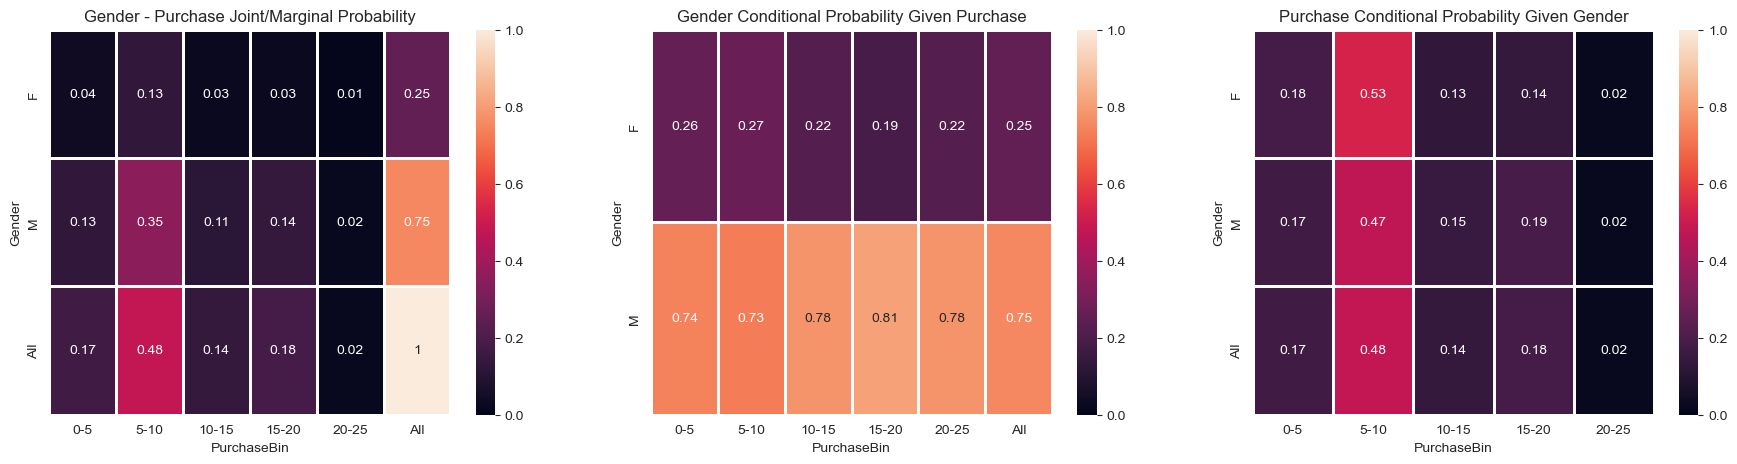

In [238]:
fig,ax = plt.subplots(1,3,figsize=(22,5))

ax[0].set_title("Gender - Purchase Joint/Marginal Probability")
sns.heatmap(gender_prob, linewidth = 1, annot = True,ax= ax[0],vmin=0,vmax=1)

ax[1].set_title("Gender Conditional Probability Given Purchase")
sns.heatmap(gender_prob_given_purchase, linewidth = 1, annot = True,ax= ax[1],vmin=0,vmax=1)

ax[2].set_title("Purchase Conditional Probability Given Gender")
sns.heatmap(purchase_prob_given_gender, linewidth = 1, annot = True,ax= ax[2],vmin=0,vmax=1)


plt.show()

- The 'Purchase' data suggests a higher prevalence of male customers in the 15,000 to 20,000 purchase range.
- The frequency of purchases is observed to be higher among males, indicating that males are more likely to make a purchase.
- In the case of purchases falling in the 5,000 to 10,000 range, the probability appears to be higher for these transactions to be conducted by females.

##### Marital_Status

In [239]:
marital_status_prob = pd.crosstab(index=df['Marital_Status'], columns=df['PurchaseBin'], margins=True, normalize=True).round(2)
marital_status_prob

PurchaseBin,0-5,5-10,10-15,15-20,20-25,All
Marital_Status,,,,,,
0,0.10,0.28,0.08,0.11,0.01,0.59
1,0.07,0.20,0.06,0.07,0.01,0.41
All,0.17,0.48,0.14,0.18,0.02,1.00


In [240]:
purchase_prob_given_marital_status = pd.crosstab(index=df['Marital_Status'], columns=df['PurchaseBin'], margins=True, normalize='index').round(2)
purchase_prob_given_marital_status

PurchaseBin,0-5,5-10,10-15,15-20,20-25
Marital_Status,,,,,
0,0.17,0.48,0.14,0.18,0.02
1,0.17,0.49,0.14,0.18,0.02
All,0.17,0.48,0.14,0.18,0.02


In [241]:
marital_status_prob_given_purchase = pd.crosstab(index=df['Marital_Status'], columns=df['PurchaseBin'], margins=True, normalize='columns').round(2)
marital_status_prob_given_purchase

PurchaseBin,0-5,5-10,10-15,15-20,20-25,All
Marital_Status,,,,,,
0,0.59,0.59,0.59,0.59,0.58,0.59
1,0.41,0.41,0.41,0.41,0.42,0.41


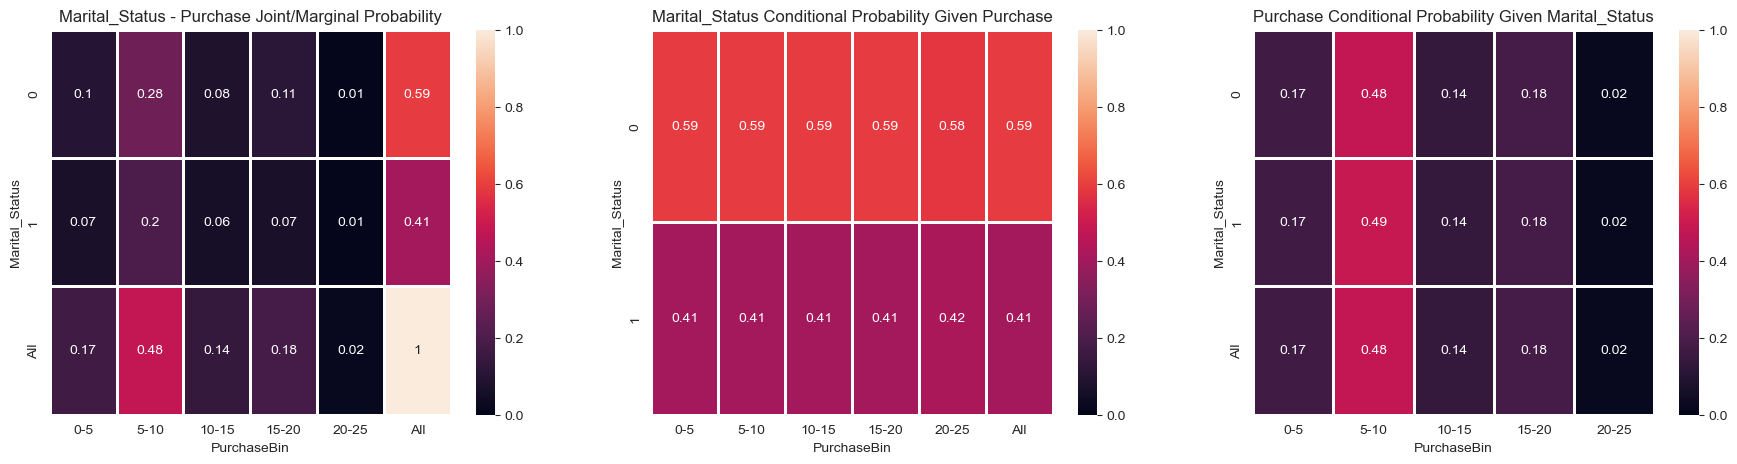

In [242]:
fig,ax = plt.subplots(1,3,figsize=(22,5))

ax[0].set_title("Marital_Status - Purchase Joint/Marginal Probability")
sns.heatmap(marital_status_prob, linewidth = 1, annot = True,ax= ax[0],vmin=0,vmax=1)

ax[1].set_title("Marital_Status Conditional Probability Given Purchase")
sns.heatmap(marital_status_prob_given_purchase, linewidth = 1, annot = True,ax= ax[1],vmin=0,vmax=1)

ax[2].set_title("Purchase Conditional Probability Given Marital_Status")
sns.heatmap(purchase_prob_given_marital_status, linewidth = 1, annot = True,ax= ax[2],vmin=0,vmax=1)


plt.show()

- The analysis doesn't reveal any significant findings, apart from the observation that unmarried individuals represent the majority of the entries in the dataset.

##### Occupation

In [243]:
occupation_prob = pd.crosstab(index=df['Occupation'], columns=df['PurchaseBin'], margins=True, normalize=True).round(2)
occupation_prob

PurchaseBin,0-5,5-10,10-15,15-20,20-25,All
Occupation,,,,,,
0,0.02,0.06,0.02,0.02,0.00,0.13
1,0.01,0.04,0.01,0.01,0.00,0.09
2,0.01,0.02,0.01,0.01,0.00,0.05
3,0.01,0.02,0.00,0.01,0.00,0.03
4,0.02,0.06,0.02,0.02,0.00,0.13
5,0.00,0.01,0.00,0.00,0.00,0.02
6,0.01,0.02,0.00,0.01,0.00,0.04
7,0.02,0.05,0.02,0.02,0.00,0.11
8,0.00,0.00,0.00,0.00,0.00,0.00


In [244]:
purchase_prob_given_occupation = pd.crosstab(index=df['Occupation'], columns=df['PurchaseBin'], margins=True, normalize='index').round(2)
purchase_prob_given_occupation

PurchaseBin,0-5,5-10,10-15,15-20,20-25
Occupation,,,,,
0,0.18,0.48,0.15,0.17,0.02
1,0.17,0.52,0.13,0.15,0.02
2,0.18,0.51,0.13,0.15,0.03
3,0.17,0.50,0.13,0.17,0.02
4,0.18,0.47,0.14,0.18,0.02
5,0.17,0.46,0.16,0.19,0.02
6,0.16,0.51,0.14,0.17,0.03
7,0.17,0.48,0.14,0.20,0.02
8,0.16,0.44,0.18,0.21,0.01


In [245]:
occupation_prob_given_purchase = pd.crosstab(index=df['Occupation'], columns=df['PurchaseBin'], margins=True, normalize='columns').round(2)
occupation_prob_given_purchase

PurchaseBin,0-5,5-10,10-15,15-20,20-25,All
Occupation,,,,,,
0,0.13,0.13,0.13,0.12,0.12,0.13
1,0.09,0.09,0.08,0.07,0.08,0.09
2,0.05,0.05,0.04,0.04,0.05,0.05
3,0.03,0.03,0.03,0.03,0.03,0.03
4,0.14,0.13,0.13,0.13,0.13,0.13
5,0.02,0.02,0.02,0.02,0.02,0.02
6,0.03,0.04,0.03,0.04,0.04,0.04
7,0.10,0.11,0.11,0.12,0.10,0.11
8,0.00,0.00,0.00,0.00,0.00,0.00


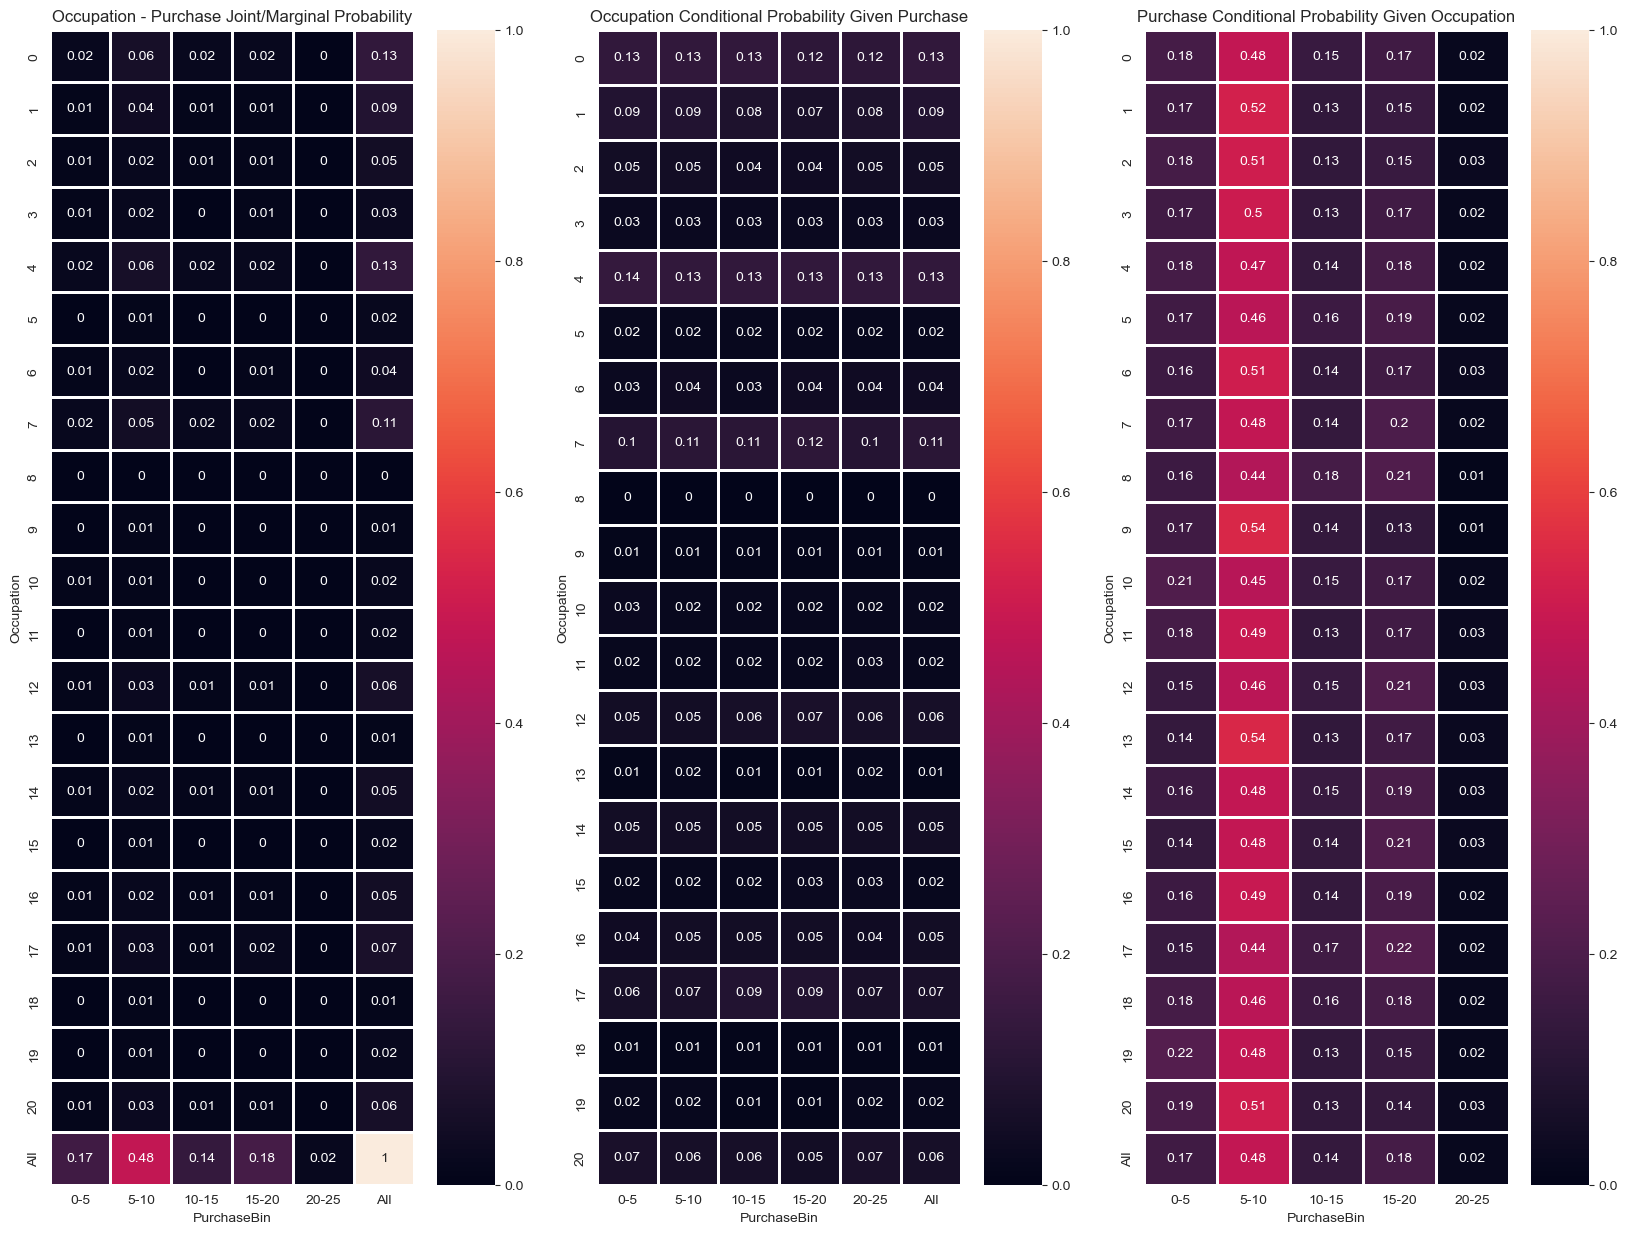

In [246]:
fig,ax = plt.subplots(1,3,figsize=(20,15))

ax[0].set_title("Occupation - Purchase Joint/Marginal Probability")
sns.heatmap(occupation_prob, linewidth = 1, annot = True,ax= ax[0],vmin=0,vmax=1)

ax[1].set_title("Occupation Conditional Probability Given Purchase")
sns.heatmap(occupation_prob_given_purchase, linewidth = 1, annot = True,ax= ax[1],vmin=0,vmax=1)

ax[2].set_title("Purchase Conditional Probability Given Occupation")
sns.heatmap(purchase_prob_given_occupation, linewidth = 1, annot = True,ax= ax[2],vmin=0,vmax=1)


plt.show()

- The dataset doesn't provide any substantial findings upon probality analysis.

##### Product_Category

In [247]:
pc_prob = pd.crosstab(index=df['Product_Category'], columns=df['PurchaseBin'], margins=True, normalize=True).round(2)
pc_prob

PurchaseBin,0-5,5-10,10-15,15-20,20-25,All
Product_Category,,,,,,
1,0.02,0.03,0.07,0.14,0.00,0.26
2,0.00,0.02,0.02,0.01,0.00,0.04
3,0.00,0.01,0.02,0.00,0.00,0.04
4,0.02,0.00,0.00,0.00,0.00,0.02
5,0.05,0.23,0.00,0.00,0.00,0.27
6,0.00,0.00,0.01,0.02,0.01,0.04
7,0.00,0.00,0.00,0.00,0.00,0.01
8,0.02,0.17,0.01,0.00,0.00,0.21
9,0.00,0.00,0.00,0.00,0.00,0.00


In [248]:
purchase_prob_given_pc = pd.crosstab(index=df['Product_Category'], columns=df['PurchaseBin'], margins=True, normalize='index').round(2)
purchase_prob_given_pc

PurchaseBin,0-5,5-10,10-15,15-20,20-25
Product_Category,,,,,
1,0.06,0.12,0.28,0.54,0.00
2,0.06,0.35,0.40,0.19,0.00
3,0.05,0.32,0.63,0.00,0.00
4,1.00,0.00,0.00,0.00,0.00
5,0.17,0.83,0.00,0.00,0.00
6,0.03,0.07,0.22,0.42,0.27
7,0.03,0.06,0.18,0.39,0.34
8,0.11,0.83,0.06,0.00,0.00
9,0.04,0.20,0.28,0.29,0.18


In [249]:
pc_prob_given_purchase = pd.crosstab(index=df['Product_Category'], columns=df['PurchaseBin'], margins=True, normalize='columns').round(2)
pc_prob_given_purchase

PurchaseBin,0-5,5-10,10-15,15-20,20-25,All
Product_Category,,,,,,
1,0.10,0.06,0.49,0.77,0.00,0.26
2,0.02,0.03,0.12,0.05,0.00,0.04
3,0.01,0.02,0.16,0.00,0.00,0.04
4,0.12,0.00,0.00,0.00,0.00,0.02
5,0.27,0.47,0.00,0.00,0.00,0.27
6,0.01,0.01,0.06,0.09,0.44,0.04
7,0.00,0.00,0.01,0.01,0.10,0.01
8,0.14,0.36,0.08,0.00,0.00,0.21
9,0.00,0.00,0.00,0.00,0.01,0.00


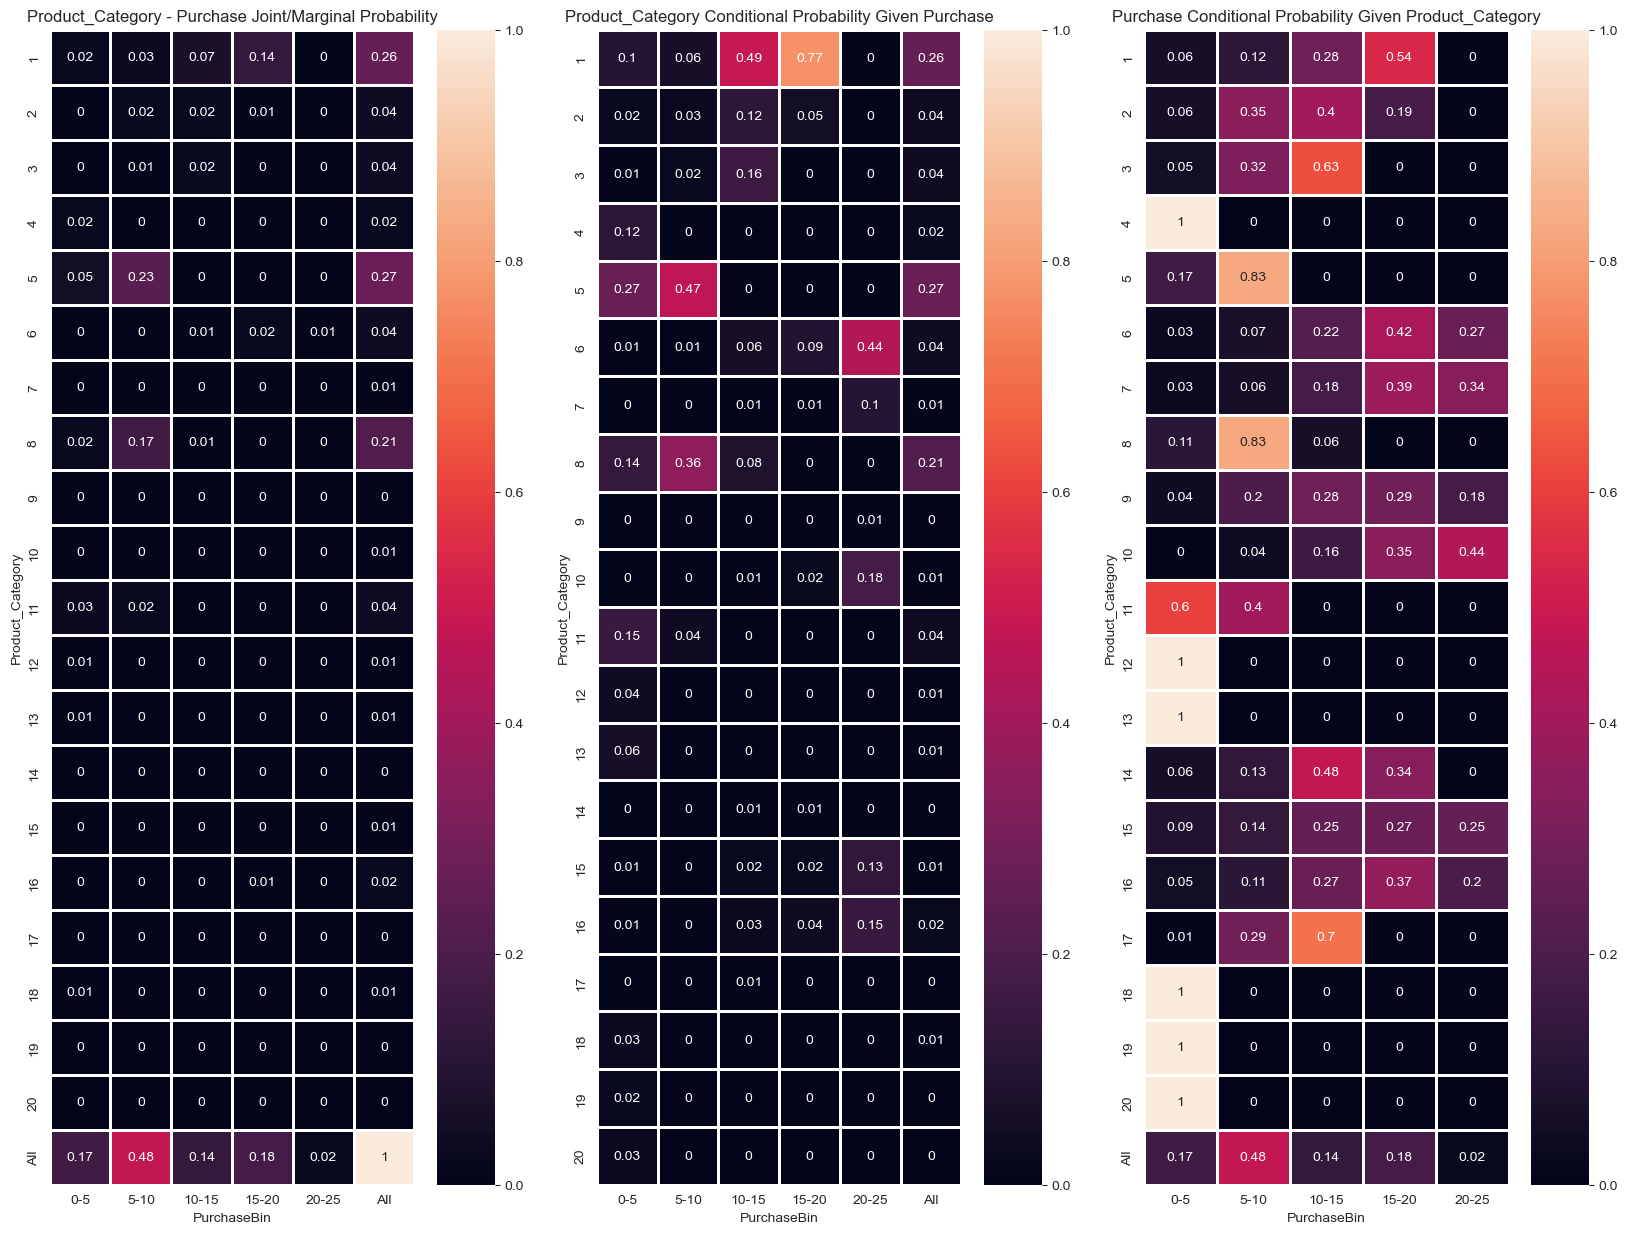

In [250]:
fig,ax = plt.subplots(1,3,figsize=(20,15))

ax[0].set_title("Product_Category - Purchase Joint/Marginal Probability")
sns.heatmap(pc_prob, linewidth = 1, annot = True,ax= ax[0],vmin=0,vmax=1)

ax[1].set_title("Product_Category Conditional Probability Given Purchase")
sns.heatmap(pc_prob_given_purchase, linewidth = 1, annot = True,ax= ax[1],vmin=0,vmax=1)

ax[2].set_title("Purchase Conditional Probability Given Product_Category")
sns.heatmap(purchase_prob_given_pc, linewidth = 1, annot = True,ax= ax[2],vmin=0,vmax=1)


plt.show()

- Given that a product falls into Categories 4, 12, 18, 19, 20, or 11, it is more likely to be associated with a purchase amount in the 0-5k range.
- If a product is in Category 5 or 8, it has a higher conditional probability of being associated with a purchase amount in the 5k-10k range.
- Products in Categories 3 or 17 have a higher conditional probability of being linked to a purchase amount in the 10k-15k range.
- A product in Category 1 or 6 has a higher conditional probability of corresponding to a purchase amount in the 15k-20k range.
- Given a product from Category 10, it's more probable for it to be associated with a purchase amount in the 20k-25k range.
- Given a purchase amount in the 10k-20k range, it has a higher conditional probability of belonging to Product Category 1. 

##### Age

In [251]:
age_prob = pd.crosstab(index=df['Age'], columns=df['PurchaseBin'], margins=True, normalize=True).round(2)
age_prob

PurchaseBin,0-5,5-10,10-15,15-20,20-25,All
Age,,,,,,
0-17,0.01,0.01,0.00,0.00,0.00,0.03
18-25,0.03,0.09,0.03,0.03,0.00,0.18
26-35,0.07,0.19,0.06,0.07,0.01,0.40
36-45,0.03,0.10,0.03,0.04,0.00,0.20
46-50,0.01,0.04,0.01,0.01,0.00,0.08
51-55,0.01,0.04,0.01,0.01,0.00,0.07
55+,0.01,0.02,0.01,0.01,0.00,0.04
All,0.17,0.48,0.14,0.18,0.02,1.00


In [252]:
purchase_prob_given_age = pd.crosstab(index=df['Age'], columns=df['PurchaseBin'], margins=True, normalize='index').round(2)
purchase_prob_given_age

PurchaseBin,0-5,5-10,10-15,15-20,20-25
Age,,,,,
0-17,0.21,0.46,0.15,0.16,0.02
18-25,0.19,0.47,0.15,0.18,0.02
26-35,0.17,0.48,0.14,0.18,0.02
36-45,0.17,0.48,0.15,0.18,0.02
46-50,0.17,0.50,0.14,0.17,0.02
51-55,0.15,0.50,0.14,0.18,0.03
55+,0.15,0.52,0.13,0.17,0.03
All,0.17,0.48,0.14,0.18,0.02


In [253]:
age_prob_given_purchase = pd.crosstab(index=df['Age'], columns=df['PurchaseBin'], margins=True, normalize='columns').round(2)
age_prob_given_purchase

PurchaseBin,0-5,5-10,10-15,15-20,20-25,All
Age,,,,,,
0-17,0.03,0.03,0.03,0.03,0.02,0.03
18-25,0.20,0.18,0.18,0.18,0.16,0.18
26-35,0.40,0.40,0.40,0.40,0.39,0.40
36-45,0.19,0.20,0.20,0.20,0.20,0.20
46-50,0.08,0.09,0.08,0.08,0.08,0.08
51-55,0.06,0.07,0.07,0.07,0.09,0.07
55+,0.03,0.04,0.04,0.04,0.05,0.04


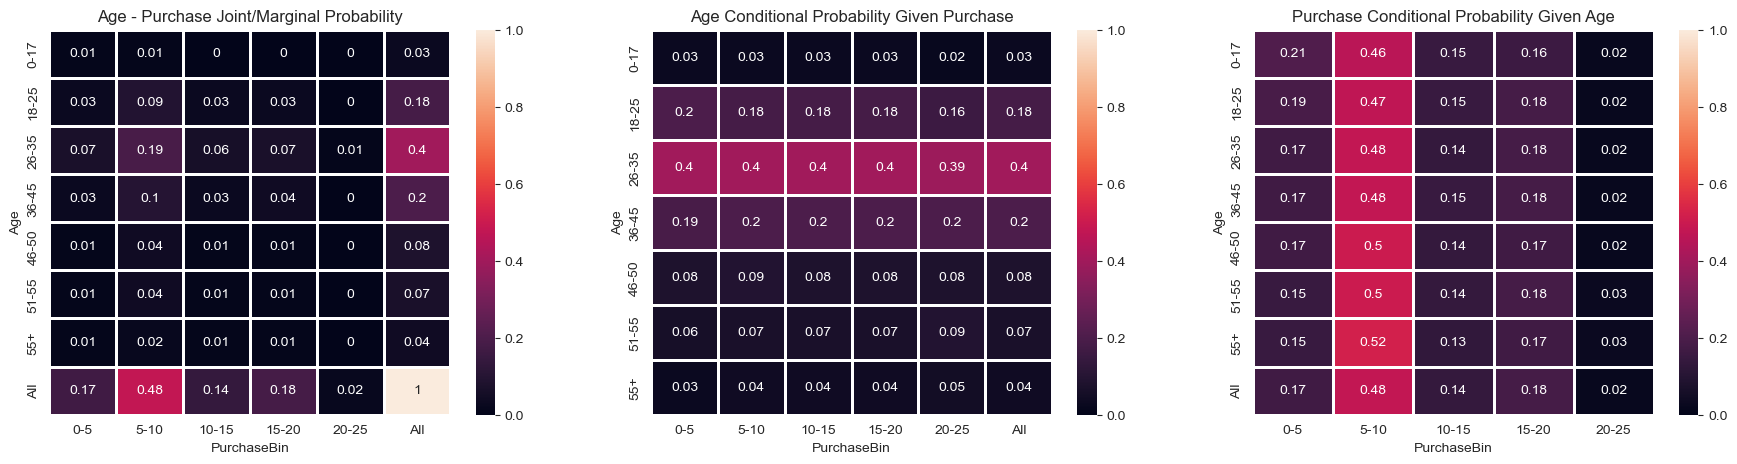

In [254]:
fig,ax = plt.subplots(1,3,figsize=(22,5))

ax[0].set_title("Age - Purchase Joint/Marginal Probability")
sns.heatmap(age_prob, linewidth = 1, annot = True,ax= ax[0],vmin=0,vmax=1)

ax[1].set_title("Age Conditional Probability Given Purchase")
sns.heatmap(age_prob_given_purchase, linewidth = 1, annot = True,ax= ax[1],vmin=0,vmax=1)

ax[2].set_title("Purchase Conditional Probability Given Age")
sns.heatmap(purchase_prob_given_age, linewidth = 1, annot = True,ax= ax[2],vmin=0,vmax=1)


plt.show()

- The dataset doesn't provide any substantial findings upon probality analysis.

##### City_Category

In [255]:
cc_prob = pd.crosstab(index=df['City_Category'], columns=df['PurchaseBin'], margins=True, normalize=True).round(2)
cc_prob

PurchaseBin,0-5,5-10,10-15,15-20,20-25,All
City_Category,,,,,,
A,0.05,0.13,0.04,0.04,0.01,0.27
B,0.07,0.20,0.06,0.07,0.01,0.42
C,0.05,0.15,0.04,0.06,0.01,0.31
All,0.17,0.48,0.14,0.18,0.02,1.00


In [256]:
purchase_prob_given_cc = pd.crosstab(index=df['City_Category'], columns=df['PurchaseBin'], margins=True, normalize='index').round(2)
purchase_prob_given_cc

PurchaseBin,0-5,5-10,10-15,15-20,20-25
City_Category,,,,,
A,0.19,0.50,0.14,0.15,0.02
B,0.18,0.49,0.14,0.17,0.02
C,0.15,0.47,0.14,0.21,0.03
All,0.17,0.48,0.14,0.18,0.02


In [257]:
cc_prob_given_purchase = pd.crosstab(index=df['City_Category'], columns=df['PurchaseBin'], margins=True, normalize='columns').round(2)
cc_prob_given_purchase

PurchaseBin,0-5,5-10,10-15,15-20,20-25,All
City_Category,,,,,,
A,0.29,0.28,0.26,0.23,0.26,0.27
B,0.43,0.42,0.42,0.41,0.40,0.42
C,0.28,0.30,0.31,0.36,0.35,0.31


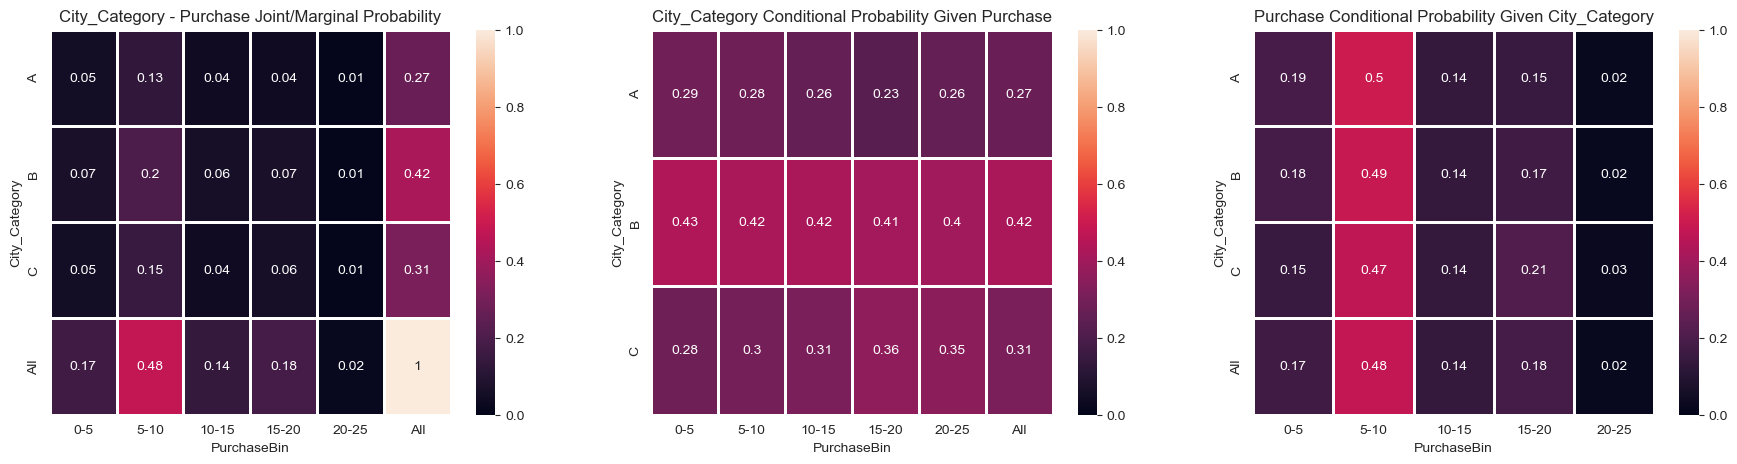

In [258]:
fig,ax = plt.subplots(1,3,figsize=(22,5))

ax[0].set_title("City_Category - Purchase Joint/Marginal Probability")
sns.heatmap(cc_prob, linewidth = 1, annot = True,ax= ax[0],vmin=0,vmax=1)

ax[1].set_title("City_Category Conditional Probability Given Purchase")
sns.heatmap(cc_prob_given_purchase, linewidth = 1, annot = True,ax= ax[1],vmin=0,vmax=1)

ax[2].set_title("Purchase Conditional Probability Given City_Category")
sns.heatmap(purchase_prob_given_cc, linewidth = 1, annot = True,ax= ax[2],vmin=0,vmax=1)


plt.show()

- The dataset doesn't provide any substantial findings upon probality analysis.

##### Stay_In_Current_City_Years

In [259]:
years_prob = pd.crosstab(index=df['Stay_In_Current_City_Years'], columns=df['PurchaseBin'], margins=True, normalize=True).round(2)
years_prob

PurchaseBin,0-5,5-10,10-15,15-20,20-25,All
Stay_In_Current_City_Years,,,,,,
0,0.02,0.07,0.02,0.02,0.00,0.14
1,0.06,0.17,0.05,0.06,0.01,0.35
2,0.03,0.09,0.03,0.03,0.00,0.19
3,0.03,0.08,0.02,0.03,0.00,0.17
4+,0.03,0.07,0.02,0.03,0.00,0.15
All,0.17,0.48,0.14,0.18,0.02,1.00


In [260]:
purchase_prob_given_years = pd.crosstab(index=df['Stay_In_Current_City_Years'], columns=df['PurchaseBin'], margins=True, normalize='index').round(2)
purchase_prob_given_years

PurchaseBin,0-5,5-10,10-15,15-20,20-25
Stay_In_Current_City_Years,,,,,
0,0.18,0.49,0.14,0.17,0.02
1,0.17,0.48,0.14,0.18,0.02
2,0.17,0.48,0.14,0.18,0.02
3,0.17,0.48,0.14,0.18,0.02
4+,0.17,0.48,0.14,0.18,0.02
All,0.17,0.48,0.14,0.18,0.02


In [261]:
years_prob_given_purchase = pd.crosstab(index=df['Stay_In_Current_City_Years'], columns=df['PurchaseBin'], margins=True, normalize='columns').round(2)
years_prob_given_purchase

PurchaseBin,0-5,5-10,10-15,15-20,20-25,All
Stay_In_Current_City_Years,,,,,,
0,0.14,0.14,0.14,0.13,0.14,0.14
1,0.35,0.35,0.35,0.35,0.36,0.35
2,0.18,0.18,0.19,0.19,0.17,0.19
3,0.17,0.17,0.17,0.18,0.17,0.17
4+,0.15,0.15,0.15,0.15,0.16,0.15


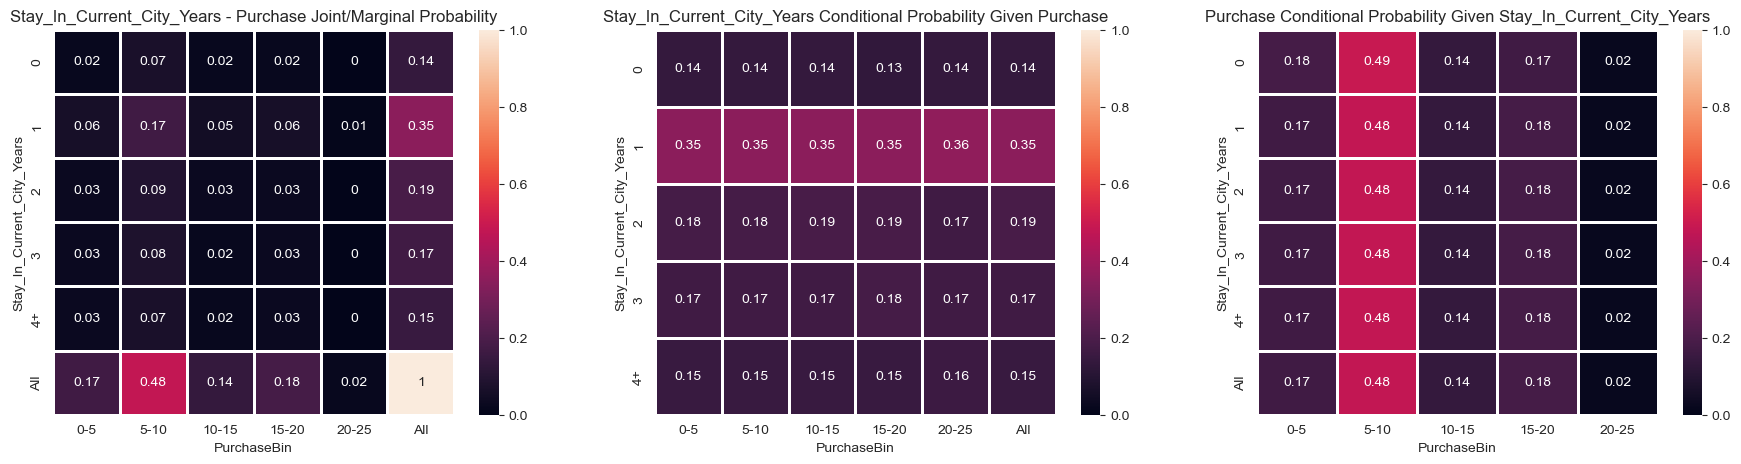

In [262]:
fig,ax = plt.subplots(1,3,figsize=(22,5))

ax[0].set_title("Stay_In_Current_City_Years - Purchase Joint/Marginal Probability")
sns.heatmap(years_prob, linewidth = 1, annot = True,ax= ax[0],vmin=0,vmax=1)

ax[1].set_title("Stay_In_Current_City_Years Conditional Probability Given Purchase")
sns.heatmap(years_prob_given_purchase, linewidth = 1, annot = True,ax= ax[1],vmin=0,vmax=1)

ax[2].set_title("Purchase Conditional Probability Given Stay_In_Current_City_Years")
sns.heatmap(purchase_prob_given_years, linewidth = 1, annot = True,ax= ax[2],vmin=0,vmax=1)


plt.show()

- The dataset doesn't provide any substantial findings upon probality analysis.

## 4. Confidence Intervals

#### Gender

In [263]:
male_purchase = df.loc[df['Gender']=='M','Purchase']
female_purchase = df.loc[df['Gender']=='F','Purchase']

In [264]:
bootstrapped_samples_male = [np.mean(np.random.choice(male_purchase, size=10000)) for i in range(10000)]
bootstrapped_samples_female = [np.mean(np.random.choice(female_purchase, size=10000)) for i in range(10000)]

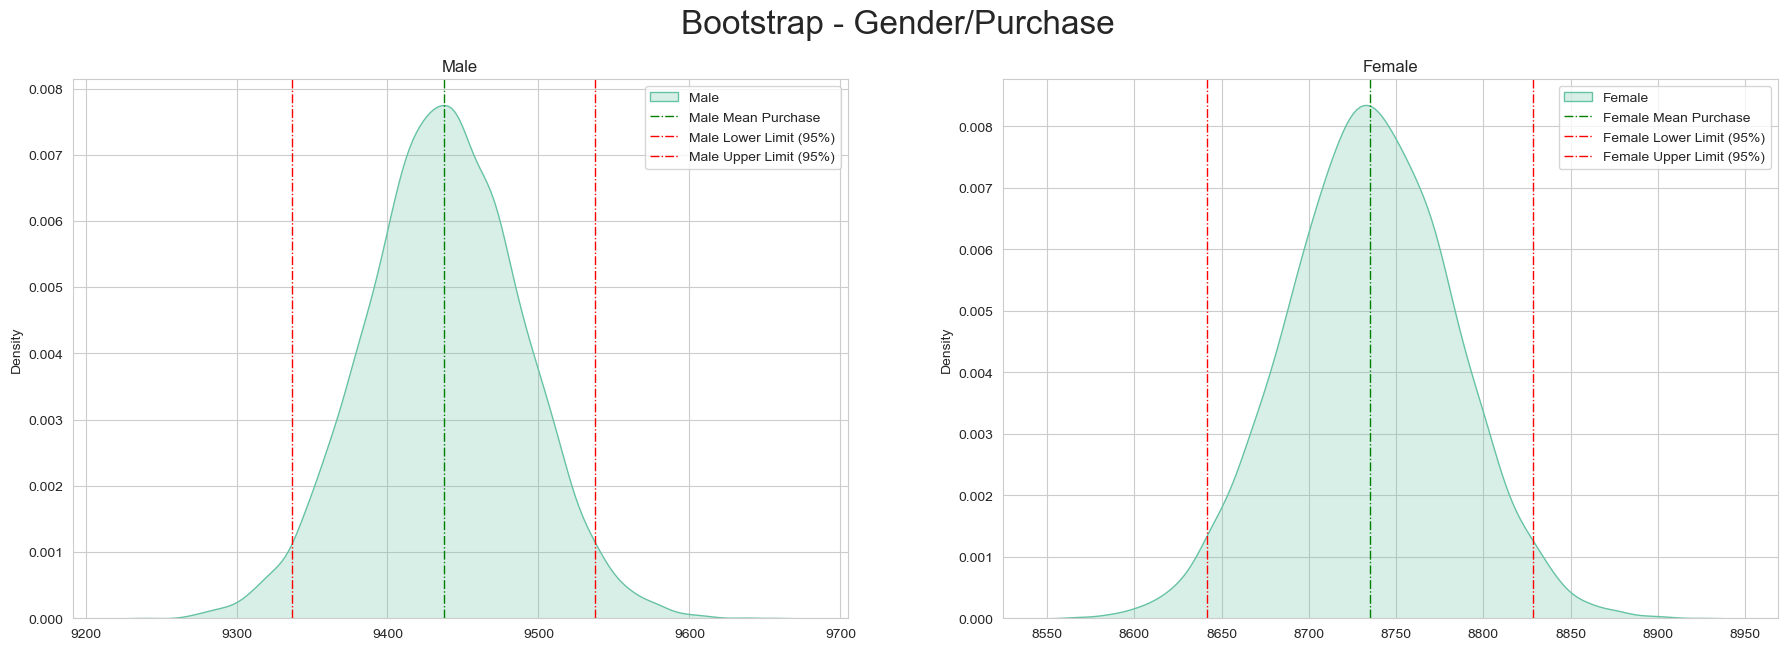

In [265]:
fig,ax = plt.subplots(1,2,figsize=(22,7))
plt.suptitle("Bootstrap - Gender/Purchase", fontsize = 24)

ax[0].set_title("Male")
sns.kdeplot(x=bootstrapped_samples_male, fill=True, ax = ax[0],label="Male")
ax[0].axvline(np.mean(bootstrapped_samples_male), color = 'g', linestyle = 'dashdot', linewidth = 1,label='Male Mean Purchase')
ax[0].axvline(np.percentile(bootstrapped_samples_male,2.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Male Lower Limit (95%)')
ax[0].axvline(np.percentile(bootstrapped_samples_male,97.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Male Upper Limit (95%)')
ax[0].legend()

ax[1].set_title("Female")
sns.kdeplot(x=bootstrapped_samples_female, fill=True, ax = ax[1],label="Female")
ax[1].axvline(np.mean(bootstrapped_samples_female), color = 'g', linestyle = 'dashdot', linewidth = 1,label='Female Mean Purchase')
ax[1].axvline(np.percentile(bootstrapped_samples_female,2.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Female Lower Limit (95%)')
ax[1].axvline(np.percentile(bootstrapped_samples_female,97.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Female Upper Limit (95%)')
ax[1].legend()

plt.show()

##### Confidence Intervals

In [266]:
print("Male:-")
print(f'Average Purchase Confidence Interval (95%): {np.percentile(bootstrapped_samples_male,2.5):.3f}, {np.percentile(bootstrapped_samples_male,97.5):.3f}')

print("\nFemale:-")
print(f'Average Purchase Confidence Interval (95%): {np.percentile(bootstrapped_samples_female,2.5):.3f}, {np.percentile(bootstrapped_samples_female,97.5):.3f}')

print("\n","="*50)

print("\nMale:-")
print(f'Average Purchase Confidence Interval (99%): {np.percentile(bootstrapped_samples_male,0.5):.3f}, {np.percentile(bootstrapped_samples_male,99.5):.3f}')

print("\nFemale:-")
print(f'Average Purchase Confidence Interval (99%): {np.percentile(bootstrapped_samples_female,0.5):.3f}, {np.percentile(bootstrapped_samples_female,99.5):.3f}')

Male:-
Average Purchase Confidence Interval (95%): 9336.822, 9537.194

Female:-
Average Purchase Confidence Interval (95%): 8641.539, 8828.412


Male:-
Average Purchase Confidence Interval (99%): 9304.828, 9574.045

Female:-
Average Purchase Confidence Interval (99%): 8613.470, 8858.954


---
**Q) Are women spending more money per transaction than men? Why or Why not?**

**At the 95% Confidence Level:**

The confidence intervals for the two groups do not overlap. This lack of overlap implies that the difference in the mean purchasing power between males and females is statistically significant at the 95% confidence level. 

**At the 99% Confidence Level:**

At this level, again, the confidence intervals for the two groups do not overlap, indicating that the difference in the mean purchasing power between these groups is statistically significant at the 99% confidence level.

**Q) Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

The 95% and 99% confidence intervals for average purchasing power of males and females do not overlap. This indicates that the difference in average spending between males and females is statistically significant at both the 95% and 99% confidence levels. As such, it can be generalized for the population that males, on average, spend more per transaction than females.

**How can Walmart Leverage this Conclusion?**

1. **Gender-Specific Marketing**: Understanding that males generally spend more per transaction can help Walmart design and implement marketing campaigns that are more targeted towards male customers, highlighting products or categories that men are more likely to buy. 

2. **Stock Inventory Management**: Inventory can be managed more efficiently by keeping a larger stock of items that are popular among male customers, given their higher average spending. 

3. **Personalized Shopping Experience**: Personalization can increase the amount spent per transaction. For example, offering product recommendations based on shopping habits, preferences, and past purchases can entice customers to add more to their carts. 

4. **Promote High-Value Items to Male Customers**: Given the higher average spending, male customers might be more willing to purchase high-value items. Advertising these products prominently to male customers could potentially increase sales.

5. **Increase Female Spending**: At the same time, efforts should be made to increase the average spending of female customers. This could be done by understanding and catering to their specific needs and preferences, creating marketing campaigns that resonate with them, and offering promotions and discounts on items popular among female customers.

6. **Improved In-Store Experience for Males**: Providing a more convenient and comfortable shopping environment can lead to higher spending. This could include improving the layout of stores or providing assistance to help male customers find what they need quickly and efficiently.

#### Marital_Status

In [267]:
unmarried_purchase = df.loc[df['Marital_Status']==0,'Purchase']
married_purchase = df.loc[df['Marital_Status']==1,'Purchase']

In [268]:
bootstrapped_samples_unmarried = [np.mean(np.random.choice(unmarried_purchase, size=10000)) for i in range(10000)]
bootstrapped_samples_married = [np.mean(np.random.choice(married_purchase, size=10000)) for i in range(10000)]

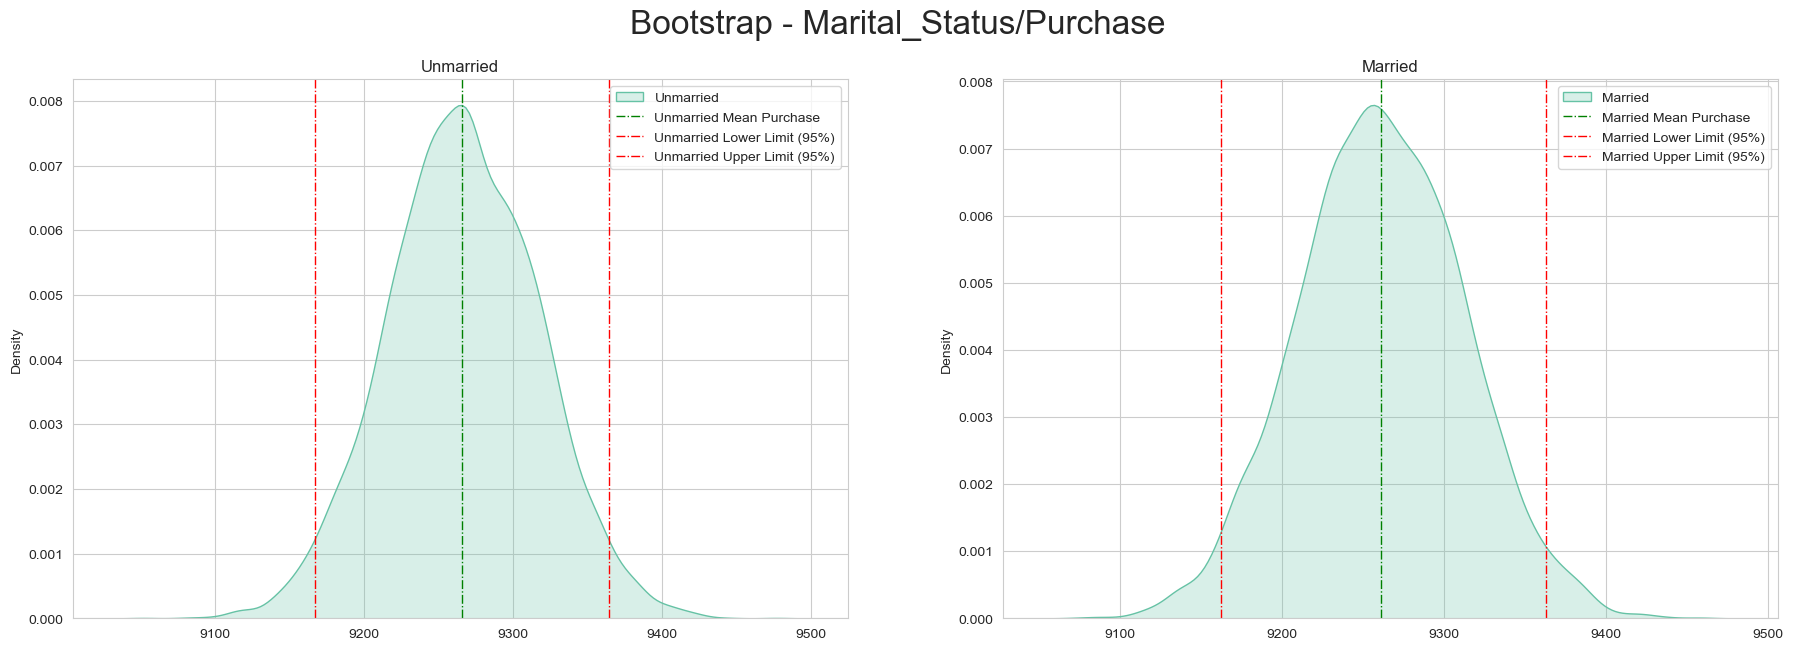

In [269]:
fig,ax = plt.subplots(1,2,figsize=(22,7))
plt.suptitle("Bootstrap - Marital_Status/Purchase", fontsize = 24)

ax[0].set_title("Unmarried")
sns.kdeplot(bootstrapped_samples_unmarried,fill=True, ax = ax[0],label='Unmarried')
ax[0].axvline(np.mean(bootstrapped_samples_unmarried), color = 'g', linestyle = 'dashdot', linewidth = 1,label='Unmarried Mean Purchase')
ax[0].axvline(np.percentile(bootstrapped_samples_unmarried,2.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Unmarried Lower Limit (95%)')
ax[0].axvline(np.percentile(bootstrapped_samples_unmarried,97.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Unmarried Upper Limit (95%)')
ax[0].legend()

ax[1].set_title("Married")
sns.kdeplot(bootstrapped_samples_married,fill=True, ax = ax[1],label='Married')
ax[1].axvline(np.mean(bootstrapped_samples_married), color = 'g', linestyle = 'dashdot', linewidth = 1,label='Married Mean Purchase')
ax[1].axvline(np.percentile(bootstrapped_samples_married,2.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Married Lower Limit (95%)')
ax[1].axvline(np.percentile(bootstrapped_samples_married,97.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Married Upper Limit (95%)')
ax[1].legend()


plt.show()

##### Confidence Intervals

In [270]:
print("Unmarried:-")
print(f'Average Purchase Confidence Interval (95%): {np.percentile(bootstrapped_samples_unmarried,2.5):.3f}, {np.percentile(bootstrapped_samples_unmarried,97.5):.3f}')

print("\nMarried:-")
print(f'Average Purchase Confidence Interval (95%): {np.percentile(bootstrapped_samples_married,2.5):.3f}, {np.percentile(bootstrapped_samples_married,97.5):.3f}')

print("\n","="*50)

print("\nUnmarried:-")
print(f'Average Purchase Confidence Interval (99%): {np.percentile(bootstrapped_samples_unmarried,0.5):.3f}, {np.percentile(bootstrapped_samples_unmarried,99.5):.3f}')

print("\nMarried:-")
print(f'Average Purchase Confidence Interval (99%): {np.percentile(bootstrapped_samples_married,0.5):.3f}, {np.percentile(bootstrapped_samples_married,99.5):.3f}')

Unmarried:-
Average Purchase Confidence Interval (95%): 9167.166, 9364.344

Married:-
Average Purchase Confidence Interval (95%): 9162.043, 9362.911


Unmarried:-
Average Purchase Confidence Interval (99%): 9138.500, 9396.639

Married:-
Average Purchase Confidence Interval (99%): 9132.659, 9388.929


---
**Q) Are married couples spending more money per transaction than unmarried members? Why or Why not?**

**At the 95% Confidence Level:**

The CIs of the two groups overlap considerably. This overlap implies that the difference in the mean purchasing power between married and unmarried individuals is not statistically significant at the 95% confidence level. 

**At the 99% Confidence Level:**

Again, the confidence intervals at this level overlap considerably, indicating that the difference in the mean purchasing power between these groups is not statistically significant at the 99% confidence level.

**Q) Are confidence intervals of average unmarried and married spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

The 95% and 99% confidence intervals for average purchasing power of married and unmarried individuals overlap considerably. This suggests that the difference in average purchasing power between married and unmarried individuals is not statistically significant at both the 95% and 99% confidence levels. Therefore, when generalized for the entire population, marital status doesn't significantly influence the purchasing power per transaction.

**How can Walmart Leverage this Conclusion?**

1. **Universal Marketing Approach**: Since marital status does not significantly affect purchasing power, Walmart can leverage this insight by creating marketing campaigns that appeal to both married and unmarried individuals, instead of segregating their promotional activities based on marital status. 

2. **Focus on Other Variables**: Walmart can invest more resources in understanding other variables like gender, age, and product categories which have shown a significant impact on purchasing behavior, instead of focusing on marital status. 

3. **Product Variety**: A broad and diverse product offering could appeal to both married and unmarried individuals, hence it's crucial to ensure a wide variety in inventory which caters to the tastes and preferences of different individuals irrespective of their marital status.

4. **Customer Loyalty Programs**: As there's no significant difference in spending based on marital status, loyalty programs can be designed to reward all customers equally based on the value of their purchases, rather than their marital status. These programs can help boost repeat business from all customers.

#### Age

In [271]:
age_0_17_purchase = df.loc[df['Age']=='0-17','Purchase']
age_18_25_purchase = df.loc[df['Age']=='18-25','Purchase']
age_26_35_purchase = df.loc[df['Age']=='26-35','Purchase']
age_36_45_purchase = df.loc[df['Age']=='36-45','Purchase']
age_46_50_purchase = df.loc[df['Age']=='46-50','Purchase']
age_51_55_purchase = df.loc[df['Age']=='51-55','Purchase']
age_55_purchase = df.loc[df['Age']=='55+','Purchase']

In [272]:
bootstrapped_samples_0_17 = np.array([np.mean(np.random.choice(age_0_17_purchase, size=10000)) for i in range(10000)])
bootstrapped_samples_18_25 = np.array([np.mean(np.random.choice(age_18_25_purchase, size=10000)) for i in range(10000)])
bootstrapped_samples_26_35 = np.array([np.mean(np.random.choice(age_26_35_purchase, size=10000)) for i in range(10000)])
bootstrapped_samples_36_45 = np.array([np.mean(np.random.choice(age_36_45_purchase, size=10000)) for i in range(10000)])
bootstrapped_samples_46_50 = np.array([np.mean(np.random.choice(age_46_50_purchase, size=10000)) for i in range(10000)])
bootstrapped_samples_51_55 = np.array([np.mean(np.random.choice(age_51_55_purchase, size=10000)) for i in range(10000)])
bootstrapped_samples_55 = np.array([np.mean(np.random.choice(age_55_purchase, size=10000)) for i in range(10000)])

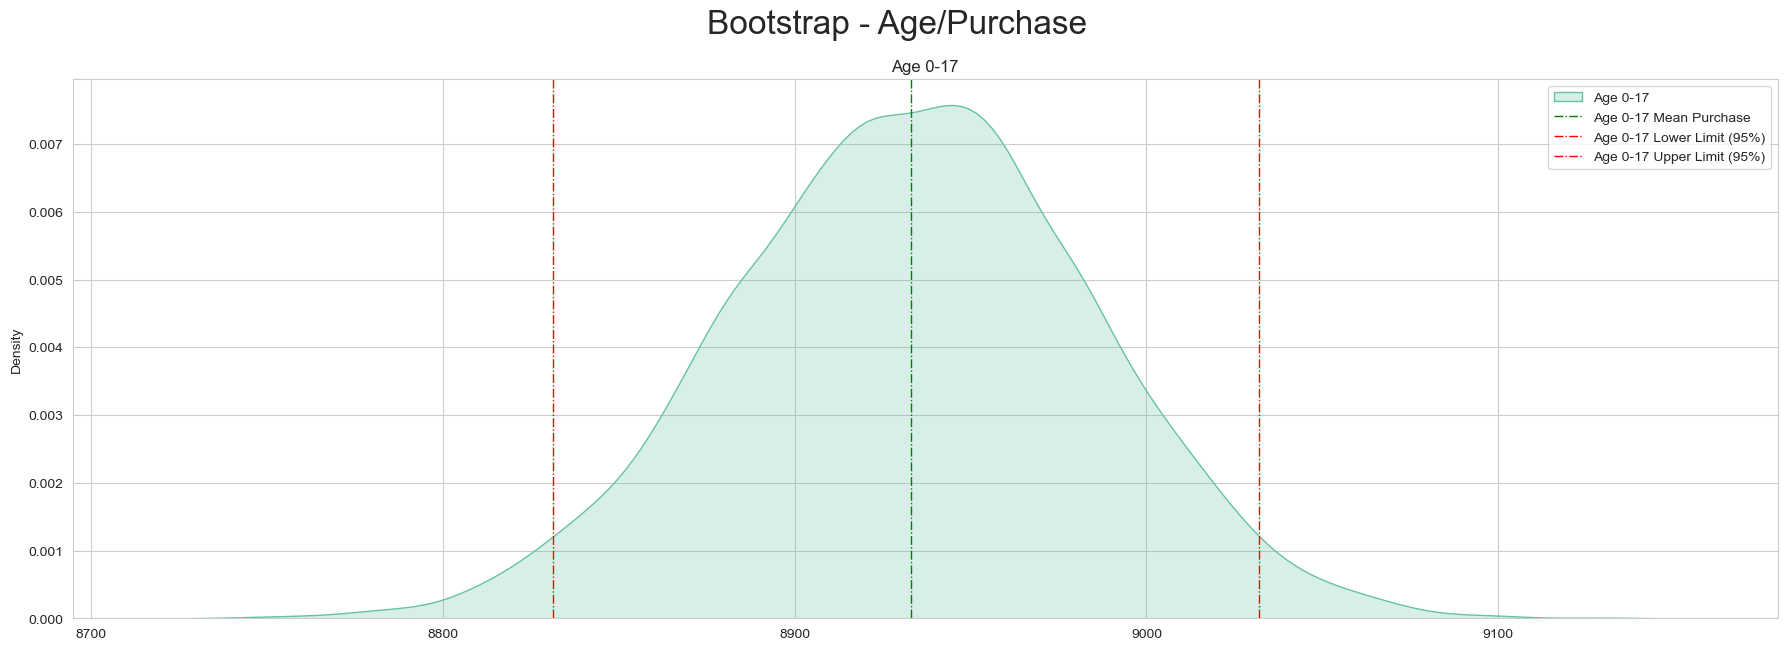

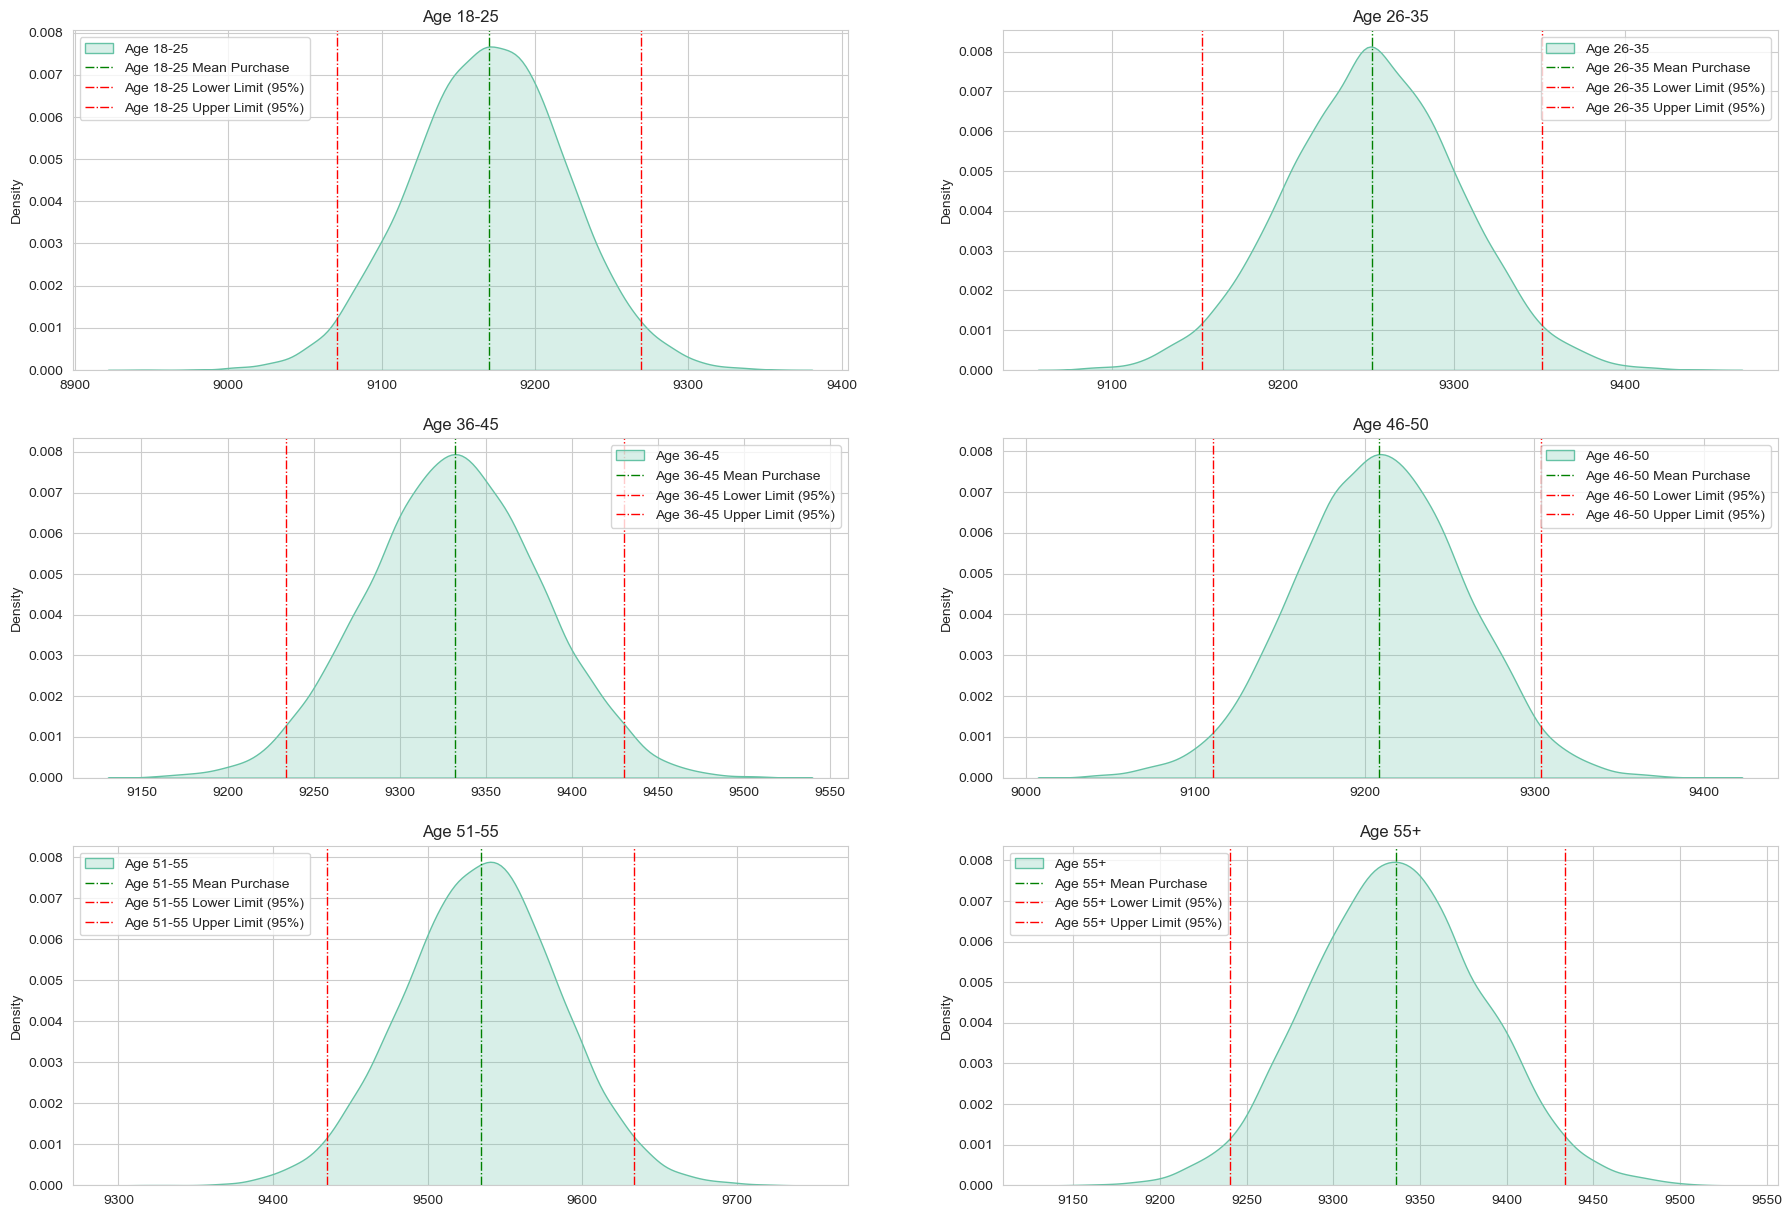

In [273]:
plt.figure(figsize=(22,7))
plt.suptitle("Bootstrap - Age/Purchase", fontsize = 24)

plt.title("Age 0-17")
sns.kdeplot(bootstrapped_samples_0_17,fill=True, label="Age 0-17")
plt.axvline(np.mean(bootstrapped_samples_0_17), color = 'g', linestyle = 'dashdot', linewidth = 1,label='Age 0-17 Mean Purchase')
plt.axvline(np.percentile(bootstrapped_samples_0_17,2.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Age 0-17 Lower Limit (95%)')
plt.axvline(np.percentile(bootstrapped_samples_0_17,97.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Age 0-17 Upper Limit (95%)')
plt.legend()

fig,ax = plt.subplots(3,2,figsize=(22,15))

ax[0,0].set_title("Age 18-25")
sns.kdeplot(bootstrapped_samples_18_25,fill=True, ax = ax[0,0],label='Age 18-25')
ax[0,0].axvline(np.mean(bootstrapped_samples_18_25), color = 'g', linestyle = 'dashdot', linewidth = 1,label='Age 18-25 Mean Purchase')
ax[0,0].axvline(np.percentile(bootstrapped_samples_18_25,2.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Age 18-25 Lower Limit (95%)')
ax[0,0].axvline(np.percentile(bootstrapped_samples_18_25,97.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Age 18-25 Upper Limit (95%)')
ax[0,0].legend()

ax[0,1].set_title("Age 26-35")
sns.kdeplot(bootstrapped_samples_26_35,fill=True, ax = ax[0,1],label="Age 26-35")
ax[0,1].axvline(np.mean(bootstrapped_samples_26_35), color = 'g', linestyle = 'dashdot', linewidth = 1,label='Age 26-35 Mean Purchase')
ax[0,1].axvline(np.percentile(bootstrapped_samples_26_35,2.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Age 26-35 Lower Limit (95%)')
ax[0,1].axvline(np.percentile(bootstrapped_samples_26_35,97.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Age 26-35 Upper Limit (95%)')
ax[0,1].legend()

ax[1,0].set_title("Age 36-45")
sns.kdeplot(bootstrapped_samples_36_45,fill=True, ax = ax[1,0],label="Age 36-45")
ax[1,0].axvline(np.mean(bootstrapped_samples_36_45), color = 'g', linestyle = 'dashdot', linewidth = 1,label='Age 36-45 Mean Purchase')
ax[1,0].axvline(np.percentile(bootstrapped_samples_36_45,2.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Age 36-45 Lower Limit (95%)')
ax[1,0].axvline(np.percentile(bootstrapped_samples_36_45,97.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Age 36-45 Upper Limit (95%)')
ax[1,0].legend()

ax[1,1].set_title("Age 46-50")
sns.kdeplot(bootstrapped_samples_46_50,fill=True, ax = ax[1,1],label="Age 46-50")
ax[1,1].axvline(np.mean(bootstrapped_samples_46_50), color = 'g', linestyle = 'dashdot', linewidth = 1,label='Age 46-50 Mean Purchase')
ax[1,1].axvline(np.percentile(bootstrapped_samples_46_50,2.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Age 46-50 Lower Limit (95%)')
ax[1,1].axvline(np.percentile(bootstrapped_samples_46_50,97.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Age 46-50 Upper Limit (95%)')
ax[1,1].legend()

ax[2,0].set_title("Age 51-55")
sns.kdeplot(bootstrapped_samples_51_55,fill=True, ax = ax[2,0],label="Age 51-55")
ax[2,0].axvline(np.mean(bootstrapped_samples_51_55), color = 'g', linestyle = 'dashdot', linewidth = 1,label='Age 51-55 Mean Purchase')
ax[2,0].axvline(np.percentile(bootstrapped_samples_51_55,2.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Age 51-55 Lower Limit (95%)')
ax[2,0].axvline(np.percentile(bootstrapped_samples_51_55,97.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Age 51-55 Upper Limit (95%)')
ax[2,0].legend()

ax[2,1].set_title("Age 55+")
sns.kdeplot(bootstrapped_samples_55,fill=True, ax = ax[2,1],label="Age 55+")
ax[2,1].axvline(np.mean(bootstrapped_samples_55), color = 'g', linestyle = 'dashdot', linewidth = 1,label='Age 55+ Mean Purchase')
ax[2,1].axvline(np.percentile(bootstrapped_samples_55,2.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Age 55+ Lower Limit (95%)')
ax[2,1].axvline(np.percentile(bootstrapped_samples_55,97.5), color = 'r', linestyle = 'dashdot', linewidth = 1,label='Age 55+ Upper Limit (95%)')
ax[2,1].legend()



plt.show()

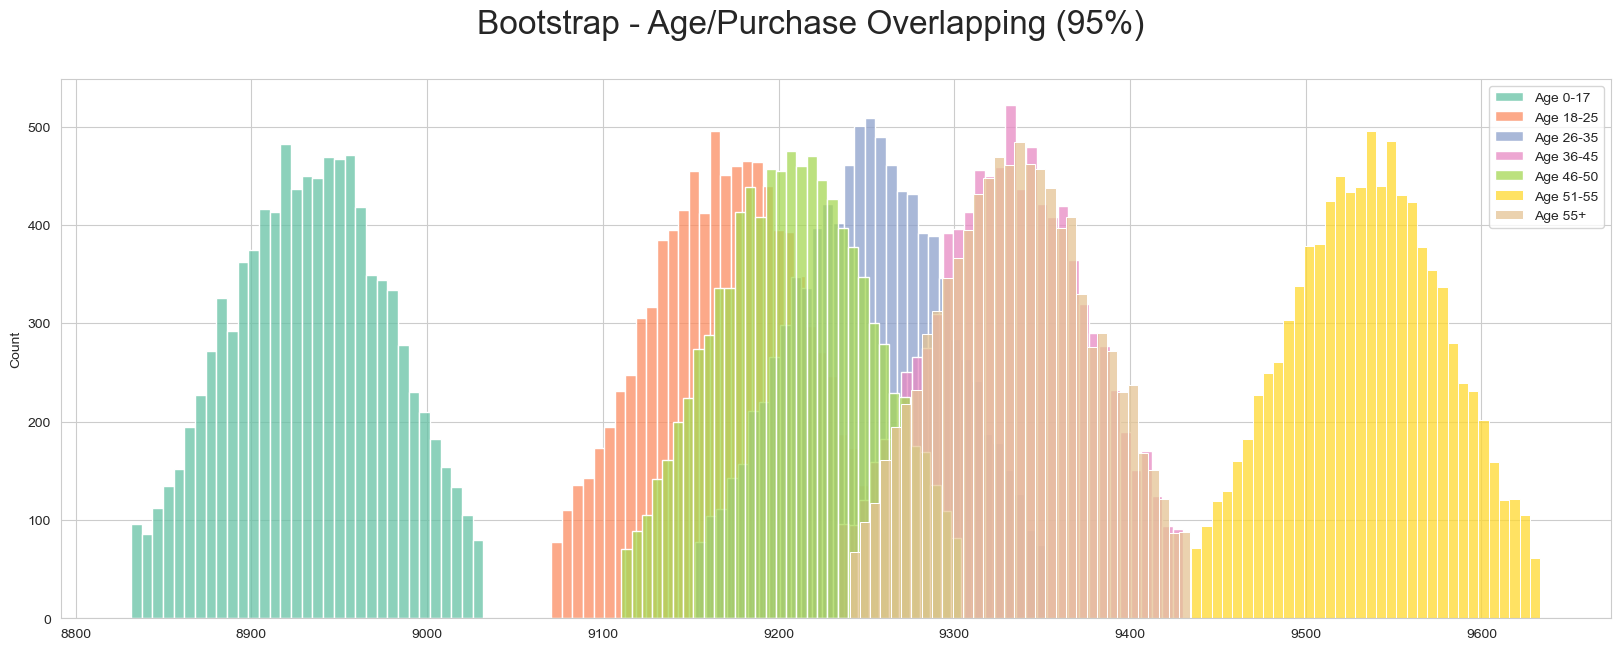

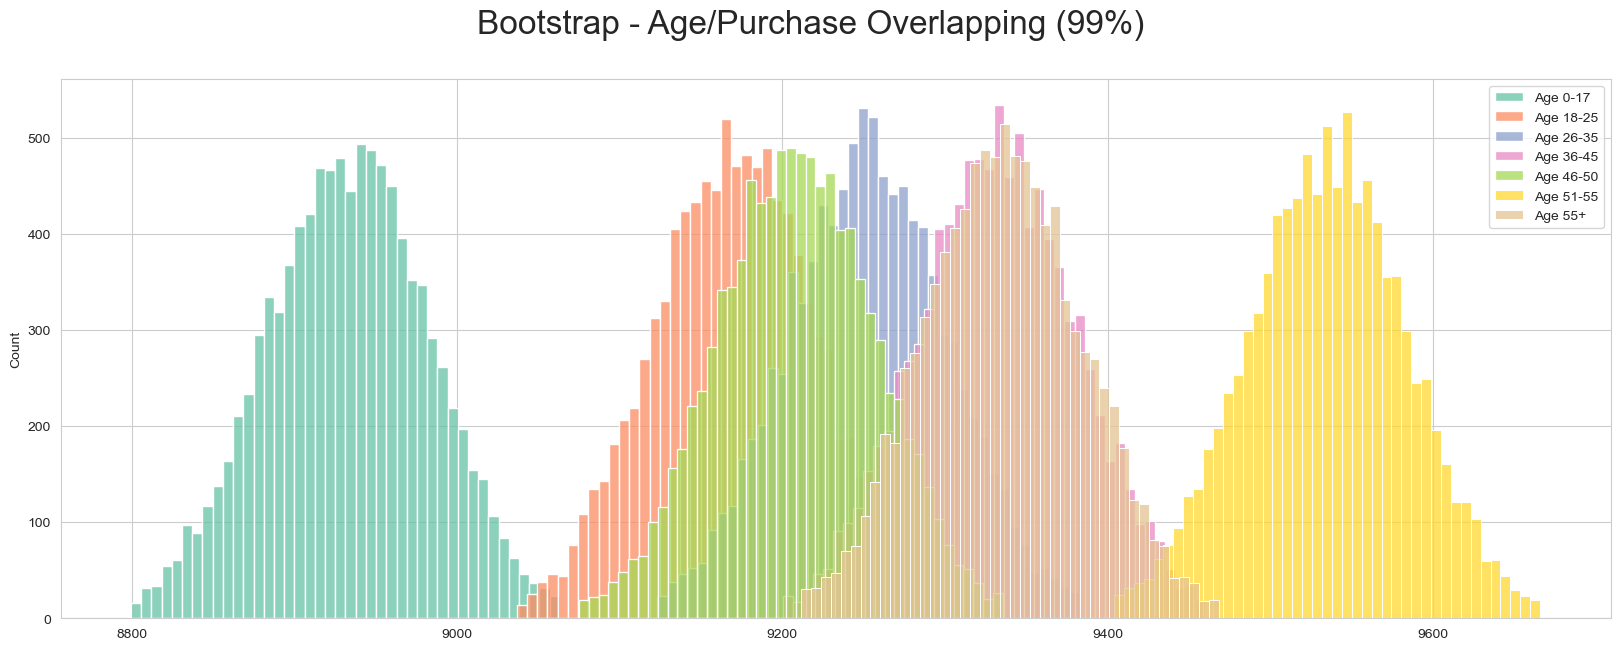

In [274]:
plt.figure(figsize=(20,7))
plt.suptitle("Bootstrap - Age/Purchase Overlapping (95%)", fontsize = 24)

sns.histplot(bootstrapped_samples_0_17[(bootstrapped_samples_0_17 >= np.percentile(bootstrapped_samples_0_17,2.5)) & (bootstrapped_samples_0_17 <= np.percentile(bootstrapped_samples_0_17,97.5))],fill=True, label='Age 0-17')

sns.histplot(bootstrapped_samples_18_25[(bootstrapped_samples_18_25 >= np.percentile(bootstrapped_samples_18_25,2.5)) & (bootstrapped_samples_18_25 <= np.percentile(bootstrapped_samples_18_25,97.5))], fill=True,label='Age 18-25')

sns.histplot(bootstrapped_samples_26_35[(bootstrapped_samples_26_35 >= np.percentile(bootstrapped_samples_26_35,2.5)) & (bootstrapped_samples_26_35 <= np.percentile(bootstrapped_samples_26_35,97.5))], fill=True,label='Age 26-35')

sns.histplot(bootstrapped_samples_36_45[(bootstrapped_samples_36_45 >= np.percentile(bootstrapped_samples_36_45,2.5)) & (bootstrapped_samples_36_45 <= np.percentile(bootstrapped_samples_36_45,97.5))], fill=True,label='Age 36-45')

sns.histplot(bootstrapped_samples_46_50[(bootstrapped_samples_46_50 >= np.percentile(bootstrapped_samples_46_50,2.5)) & (bootstrapped_samples_46_50 <= np.percentile(bootstrapped_samples_46_50,97.5))], fill=True,label='Age 46-50')

sns.histplot(bootstrapped_samples_51_55[(bootstrapped_samples_51_55 >= np.percentile(bootstrapped_samples_51_55,2.5)) & (bootstrapped_samples_51_55 <= np.percentile(bootstrapped_samples_51_55,97.5))], fill=True,label='Age 51-55')

sns.histplot(bootstrapped_samples_55[(bootstrapped_samples_55 >= np.percentile(bootstrapped_samples_55,2.5)) & (bootstrapped_samples_55 <= np.percentile(bootstrapped_samples_55,97.5))], fill=True,label='Age 55+')

plt.legend()
plt.show()

plt.figure(figsize=(20,7))
plt.suptitle("Bootstrap - Age/Purchase Overlapping (99%)", fontsize = 24)

sns.histplot(bootstrapped_samples_0_17[(bootstrapped_samples_0_17 >= np.percentile(bootstrapped_samples_0_17,0.5)) & (bootstrapped_samples_0_17 <= np.percentile(bootstrapped_samples_0_17,99.5))], fill=True,label='Age 0-17')

sns.histplot(bootstrapped_samples_18_25[(bootstrapped_samples_18_25 >= np.percentile(bootstrapped_samples_18_25,0.5)) & (bootstrapped_samples_18_25 <= np.percentile(bootstrapped_samples_18_25,99.5))], fill=True,label='Age 18-25')

sns.histplot(bootstrapped_samples_26_35[(bootstrapped_samples_26_35 >= np.percentile(bootstrapped_samples_26_35,0.5)) & (bootstrapped_samples_26_35 <= np.percentile(bootstrapped_samples_26_35,99.5))], fill=True,label='Age 26-35')

sns.histplot(bootstrapped_samples_36_45[(bootstrapped_samples_36_45 >= np.percentile(bootstrapped_samples_36_45,0.5)) & (bootstrapped_samples_36_45 <= np.percentile(bootstrapped_samples_36_45,99.5))], fill=True,label='Age 36-45')

sns.histplot(bootstrapped_samples_46_50[(bootstrapped_samples_46_50 >= np.percentile(bootstrapped_samples_46_50,0.5)) & (bootstrapped_samples_46_50 <= np.percentile(bootstrapped_samples_46_50,99.5))], fill=True,label='Age 46-50')

sns.histplot(bootstrapped_samples_51_55[(bootstrapped_samples_51_55 >= np.percentile(bootstrapped_samples_51_55,0.5)) & (bootstrapped_samples_51_55 <= np.percentile(bootstrapped_samples_51_55,99.5))], fill=True,label='Age 51-55')

sns.histplot(bootstrapped_samples_55[(bootstrapped_samples_55 >= np.percentile(bootstrapped_samples_55,0.5)) & (bootstrapped_samples_55 <= np.percentile(bootstrapped_samples_55,99.5))], fill=True,label='Age 55+')

plt.legend()
plt.show()

##### Confidence Intervals

In [275]:
print("Age 0-17")
print(f'Average Purchase Confidence Interval (95%): {np.percentile(bootstrapped_samples_0_17,2.5):.3f}, {np.percentile(bootstrapped_samples_0_17,97.5):.3f}')

print("\nAge 18-25")
print(f'Average Purchase Confidence Interval (95%): {np.percentile(bootstrapped_samples_18_25,2.5):.3f}, {np.percentile(bootstrapped_samples_18_25,97.5):.3f}')

print("\nAge 26-35")
print(f'Average Purchase Confidence Interval (95%): {np.percentile(bootstrapped_samples_26_35,2.5):.3f}, {np.percentile(bootstrapped_samples_26_35,97.5):.3f}')

print("\nAge 36-45")
print(f'Average Purchase Confidence Interval (95%): {np.percentile(bootstrapped_samples_36_45,2.5):.3f}, {np.percentile(bootstrapped_samples_36_45,97.5):.3f}')

print("\nAge 46-50")
print(f'Average Purchase Confidence Interval (95%): {np.percentile(bootstrapped_samples_46_50,2.5):.3f}, {np.percentile(bootstrapped_samples_46_50,97.5):.3f}')

print("\nAge 51-55")
print(f'Average Purchase Confidence Interval (95%): {np.percentile(bootstrapped_samples_51_55,2.5):.3f}, {np.percentile(bootstrapped_samples_51_55,97.5):.3f}')

print("\nAge 55+")
print(f'Average Purchase Confidence Interval (95%): {np.percentile(bootstrapped_samples_55,2.5):.3f}, {np.percentile(bootstrapped_samples_55,97.5):.3f}')

print("\n","="*50)

print("\nAge 0-17")
print(f'Average Purchase Confidence Interval (99%): {np.percentile(bootstrapped_samples_0_17,0.5):.3f}, {np.percentile(bootstrapped_samples_0_17,99.5):.3f}')

print("\nAge 18-25")
print(f'Average Purchase Confidence Interval (99%): {np.percentile(bootstrapped_samples_18_25,0.5):.3f}, {np.percentile(bootstrapped_samples_18_25,99.5):.3f}')

print("\nAge 26-35")
print(f'Average Purchase Confidence Interval (99%): {np.percentile(bootstrapped_samples_26_35,0.5):.3f}, {np.percentile(bootstrapped_samples_26_35,99.5):.3f}')

print("\nAge 36-45")
print(f'Average Purchase Confidence Interval (99%): {np.percentile(bootstrapped_samples_36_45,0.5):.3f}, {np.percentile(bootstrapped_samples_36_45,99.5):.3f}')

print("\nAge 46-50")
print(f'Average Purchase Confidence Interval (99%): {np.percentile(bootstrapped_samples_46_50,0.5):.3f}, {np.percentile(bootstrapped_samples_46_50,99.5):.3f}')

print("\nAge 51-55")
print(f'Average Purchase Confidence Interval (99%): {np.percentile(bootstrapped_samples_51_55,0.5):.3f}, {np.percentile(bootstrapped_samples_51_55,99.5):.3f}')

print("\nAge 55+")
print(f'Average Purchase Confidence Interval (99%): {np.percentile(bootstrapped_samples_55,0.5):.3f}, {np.percentile(bootstrapped_samples_55,99.5):.3f}')

Age 0-17
Average Purchase Confidence Interval (95%): 8831.411, 9031.939

Age 18-25
Average Purchase Confidence Interval (95%): 9070.653, 9269.127

Age 26-35
Average Purchase Confidence Interval (95%): 9152.502, 9351.695

Age 36-45
Average Purchase Confidence Interval (95%): 9234.034, 9430.142

Age 46-50
Average Purchase Confidence Interval (95%): 9110.438, 9303.970

Age 51-55
Average Purchase Confidence Interval (95%): 9434.745, 9633.376

Age 55+
Average Purchase Confidence Interval (95%): 9240.369, 9433.897


Age 0-17
Average Purchase Confidence Interval (99%): 8799.657, 9063.350

Age 18-25
Average Purchase Confidence Interval (99%): 9036.872, 9300.466

Age 26-35
Average Purchase Confidence Interval (99%): 9123.328, 9382.312

Age 36-45
Average Purchase Confidence Interval (99%): 9200.496, 9460.050

Age 46-50
Average Purchase Confidence Interval (99%): 9074.959, 9335.648

Age 51-55
Average Purchase Confidence Interval (99%): 9403.905, 9665.899

Age 55+
Average Purchase Confidence Inter

---
**At the 95% Confidence Level:**

- In the age category "0-17", the Confidence Interval (CI) spans from 8833.401 to 9033.614. This CI does not overlap with those of any other age groups, suggesting that the true mean of the purchasing power for this group is statistically distinct from the others.
- Similarly, the "Age 51-55" category, with a CI of 9438.040 to 9635.155, does not intersect with the CIs of any other groups, implying a distinct population mean for purchasing power that is statistically different from the others.

**At the 99% Confidence Level:**

Upon inspection of the provided data, it appears that all the confidence intervals within the second group intersect with at least one other. This overlap implies that the difference in the mean purchasing power between these age groups is not statistically significant at the 99% confidence level.

**Q) Are confidence intervals of average age group spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

The provided data shows that, at the 95% confidence level, the confidence intervals for the "0-17" and "51-55" age groups do not overlap with any other age groups, indicating that these two groups have statistically distinct average purchasing power. However, at the 99% confidence level, the confidence intervals for all age groups overlap, suggesting that there is no statistically significant difference in purchasing power across different age groups at this higher level of confidence.

**How can Walmart Leverage this Conclusion?**

1. **Age-Specific Marketing**: The "0-17" and "51-55" age groups exhibit distinct purchasing behavior at the 95% confidence level. This information could be used by Walmart to develop targeted marketing strategies for these specific age groups. For example, they could offer age-relevant products and promotions tailored to the interests and needs of these age groups.

2. **Inclusive Marketing**: At the 99% confidence level, the purchasing power does not significantly differ across age groups. Therefore, Walmart can devise marketing campaigns that appeal broadly to all age groups. This might include advertising a diverse range of products and ensuring promotional messages are inclusive and relatable to a wide audience.

3. **Product Offering**: Considering the variance in purchasing power among different age groups at the 95% confidence level, it's essential that Walmart's product range caters to the needs and preferences of different age demographics. This might involve offering a broad selection of toys, school supplies, and clothing for the "0-17" group, and household goods, health products, and electronics for the "51-55" group.

4. **Store Layout**: Walmart can arrange their stores in a way that caters to the shopping needs of different age groups. For instance, they could position products for younger customers (0-17) in easily accessible areas, while items that appeal to the older demographic (51-55) could be situated in quieter, more peaceful sections of the store.

## 5. Insights & Recommendations

### 5.1 Insights

_In depth Analysis done under each cell_


**Univariate Analysis:**

- The dataset consists of a mix of categorical (5 columns) and numerical variables (5 columns), including 'Purchase', 'Product_ID', 'User_ID', 'Occupation', etc.
- The distribution of 'Purchase' is positively skewed (skewness = 0.600), with a peak less than the mean and outliers towards the upper range. The distribution is platykurtic (kurtosis = -0.388), indicating fewer or less extreme outliers.
- Majority of the entries are males (75.3%) and are from 'City B'.
- The largest represented age group in the dataset is 26-35, and the least is 0-17.
- Most customers have stayed in their current city for at least 1 year.
- The most frequent occupation is '4', while '8' is the least common.
- From Product Category 5 most purchase has been made and 9 least
- 100% Customers repeat Observed

**Bivariate Analysis:**

- 'Product Category 10' is associated with higher purchase amounts.
- 'Age' and 'Stay_In_Current_City_Years' also do not appear to have a significant impact on 'Purchase'.
- Males are found to have a higher frequency of purchases and are more likely to spend in the 15,000 to 20,000 purchase range.
- Females are more likely to spend in the 5,000 to 10,000 range.
- Individuals from 'City C' show slightly higher purchasing activity.
- Marital Status does not significantly impact 'Purchase'.

**Multivariate Analysis:**

- 'Product Category' is negatively correlated with 'Purchase'.
- Significant Purchase amount differnce observed under Product Category 9 when compared to Male

**Probability Analysis**
- The probability of a product falling into certain categories varies depending on the purchase amount.
- The probability of purchases falling within certain ranges differs for males and females.
- Purchase behavior is independent of marital status.

**Statistical Analysis:**

- Gender: From the given data, the 95% and 99% confidence intervals for males and females' average purchasing power do not overlap. This indicates that males and females have significantly different purchasing power at both the 95% and 99% confidence levels. As such, it can be generalized for the population that males, on average, spend more per transaction than females.

- Marital Status: On the other hand, the 95% and 99% confidence intervals for married and unmarried individuals' purchasing power overlap considerably. This suggests that the difference in average purchasing power between married and unmarried individuals is not statistically significant at these confidence levels. Therefore, when generalized for the entire population, marital status doesn't significantly influence the purchasing power per transaction.

- Age: In terms of age, the 95% confidence interval for the '0-17' and '51-55' age groups did not overlap with any other age groups. This suggests that these two age groups have statistically distinct average purchasing powers, and this observation can be generalized to the population. The 99% confidence intervals for all age groups overlap, indicating that at this higher confidence level, there's no statistically significant difference in the purchasing power across different age groups.

**Overall Anlaysis:**

- The typical customer is likely to be a male aged between 26 and 35, staying at least 1 year in a city, most probably 'City B'.
- Occupation does not seem to significantly influence purchasing behavior.
- Males tend to make more purchases and spend more per transaction than females.
- Age, city of residence, and marital status seem to have less direct influence on purchasing behavior.
- The product category can influence the likelihood of a product being associated with a certain purchase amount range.
- Despite some outliers, the majority of customers have a purchasing power below $15,000.

### 5.2 Recommendations

Certainly! Based on the analysis, we can derive the following strategies to improve overall sales and tap into untapped variables:

1. **Leverage Age Group Data**: While the 26-35 age group dominates, don't forget the other age brackets, particularly 0-17 and 51-55. These groups show statistically distinct purchasing power. Tailor marketing strategies to these groups to increase overall sales. For instance, collaborate with popular brands or influencers that these age groups resonate with.

2. **Engage with Female Customers**: Even though the data shows that males tend to spend more per transaction, there's potential for growth within the female customer base. Try creating marketing campaigns, offering products or services specifically geared toward female customers. This could potentially increase their average spending and, therefore, overall sales.

3. **Focus on Less Represented Cities**: While City B make up a majority of the customers, there might be potential for growth in other cities. Explore opportunities to expand in these locations through location-specific marketing or even physical stores.

4. **Target Less Common Occupations**: The data shows that most customers fall under the occupation '4'. Explore opportunities to understand the needs of those in less common occupations. This could reveal new, untapped customer segments. 

5. **Improve Stock Management**: Ensure that the stock levels of less popular product categories are managed to avoid overstock and wastage. Focus on promoting the sale of these products through discount campaigns or bundling them with more popular items.

6. **Boost Online Presence**: Develop an engaging and easy-to-navigate online platform that could reach customers irrespective of their city, occupation, or gender. This can be especially beneficial given the increasing trend of online shopping.

7. **Loyalty Programs**: Encourage repeat purchases and higher spending by offering a loyalty program. Customers could earn points for each purchase that can be redeemed for discounts, special offers, or exclusive products.